<a href="https://www.kaggle.com/code/thirumani/shark-tank-india-analysis?scriptVersionId=118565366" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Shark Tank India (Season 1 & Season 2) Exploratory Data Analysis (EDA)

## Dataset https://www.kaggle.com/datasets/thirumani/shark-tank-india

In [1]:
from IPython.display import IFrame
import datetime
print("Notebook was last executed on:", datetime.date.today().strftime("%Y-%b-%d"))

Notebook was last executed on: 2023-Feb-08


In [2]:
# Source: Wikipedia
IFrame('https://upload.wikimedia.org/wikipedia/en/2/2f/Shark_Tank_India.jpg', width=330, height=330)

### Importing Required Python Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import geopandas as gpd
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
pio.renderers.default = 'notebook'

### Check and import dataset

In [4]:
! ls -l /kaggle/input/d/thirumani/shark-tank-india/
shark_tank = pd.read_csv('/kaggle/input/d/thirumani/shark-tank-india//Shark Tank India.csv', encoding = "ISO-8859-1")

nRow, nCol = shark_tank.shape
print(f'\nThere are {nRow} rows and {nCol} columns in the dataset')

total 48
-rw-r--r-- 1 nobody nogroup 48681 Feb  8 11:03 'Shark Tank India.csv'

There are 239 rows and 56 columns in the dataset


## 💵 Exploratory Data Analysis (EDA)

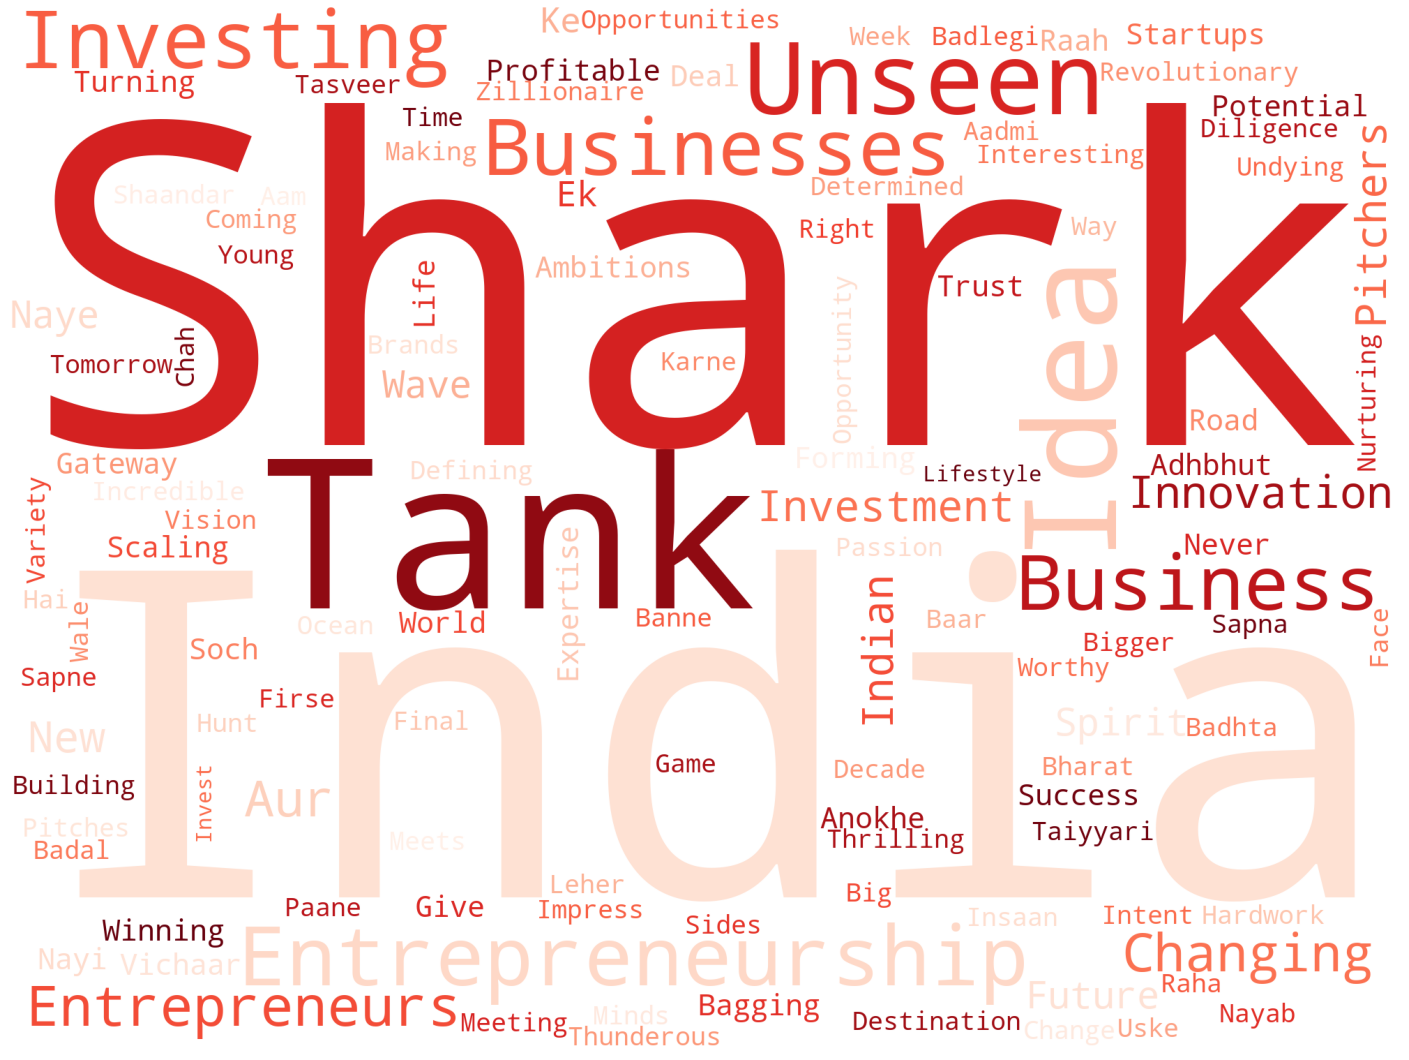

In [5]:
# Word cloud based on episode titles
text = " Shark Tank India ".join(cat for cat in shark_tank.loc[shark_tank['Episode Title'].notnull()]['Episode Title'])
stop_words = list(STOPWORDS) + ["Ka", "Ki", "Ko"]
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='white', colormap='Reds', collocations=False, random_state=2023).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [6]:
shark_tank.head(5)

Season Number  Episode Number                Episode Title  Pitch Number  \
0            1.0             1.0  Badlegi Business Ki Tasveer           1.0   
1            1.0             1.0  Badlegi Business Ki Tasveer           2.0   
2            1.0             1.0  Badlegi Business Ki Tasveer           3.0   
3            1.0             2.0      Insaan, Ideas Aur Sapne           4.0   
4            1.0             2.0      Insaan, Ideas Aur Sapne           5.0   

       Startup Name             Industry  \
0     BluePineFoods                 Food   
1      BoozScooters  Electrical Vehicles   
2  HeartUpMySleeves       Beauty/Fashion   
3         TagzFoods                 Food   
4      HeadAndHeart            Education   

                            Business Description  \
0                                   Frozen Momos   
1  Renting e-bike for mobility in private spaces   
2                             Detachable Sleeves   
3                    Healthy Potato Chips Snacks   
4                       Brain Development Course   

                 Company Website  Number of Presenters  Male Presenters  \
0     https://bluepinefoods.com/                   3.0              2.0   
1        https://www.boozup.net/                   1.0              1.0   
2  https://heartupmysleeves.com/                   1.0              NaN   
3         https://tagzfoods.com/                   2.0              2.0   
4             https://thehnh.in/                   4.0              1.0   

   Female Presenters  Transgender Presenters  Couple Presenters  \
0                1.0                     NaN                0.0   
1                NaN                     NaN                0.0   
2                1.0                     NaN                0.0   
3                NaN                     NaN                0.0   
4                3.0                     NaN                1.0   

  Pitchers Average Age  Started in Pitchers City Pitchers State  \
0               Middle      2016.0         Delhi          Delhi   
1                Young      2017.0     Ahmedabad        Gujarat   
2                Young      2021.0         Delhi          Delhi   
3               Middle      2019.0     Bangalore      Karnataka   
4               Middle      2015.0           NaN         Punjab   

   Yearly Revenue  Monthly Sales  Gross Margin  Net Margin  \
0            95.0            8.0           NaN         NaN   
1             4.0            0.4           NaN         NaN   
2             NaN            2.0           NaN         NaN   
3           700.0            NaN          48.0         NaN   
4            30.0            NaN           NaN         NaN   

   Original Ask Amount  Original Offered Equity  Valuation Requested  \
0                 50.0                      5.0               1000.0   
1                 40.0                     15.0                267.0   
2                 25.0                     10.0                250.0   
3                 70.0                      1.0               7000.0   
4                 50.0                      5.0               1000.0   

   Received Offer  ...  Number of sharks in deal  Ashneer Investment Amount  \
0             1.0  ...                       3.0                       25.0   
1             1.0  ...                       2.0                       20.0   
2             1.0  ...                       2.0                        NaN   
3             1.0  ...                       1.0                       70.0   
4             0.0  ...                       NaN                        NaN   

   Ashneer Investment Equity  Ashneer Debt Amount  Namita Investment Amount  \
0                       5.33                  NaN                       NaN   
1                      25.00                  NaN                       NaN   
2                        NaN                  NaN                       NaN   
3                       2.75                  NaN                       NaN   
4                

In [7]:
shark_tank.tail(10).T

229  \
Season Number                                      2.0   
Episode Number                                    26.0   
Episode Title                    Bharat Badal Raha Hai   
Pitch Number                                     230.0   
Startup Name                                GavinParis   
Industry                                Beauty/Fashion   
Business Description            Gender-Neutral Fashion   
Company Website            https://www.gavinparis.com/   
Number of Presenters                               2.0   
Male Presenters                                    2.0   
Female Presenters                                  NaN   
Transgender Presenters                             NaN   
Couple Presenters                                  0.0   
Pitchers Average Age                             Young   
Started in                                      2022.0   
Pitchers City                                  Kolkata   
Pitchers State                             West Bengal   
Yearly Revenue                                   114.0   
Monthly Sales                                      NaN   
Gross Margin                                      60.0   
Net Margin                                         NaN   
Original Ask Amount                               50.0   
Original Offered Equity                            5.0   
Valuation Requested                             1000.0   
Received Offer                                     1.0   
Accepted Offer                                     0.0   
Total Deal Amount                                  NaN   
Total Deal Equity                                  NaN   
Total Deal Debt                                    NaN   
Debt Interest                                      NaN   
Valuation Offered                                  NaN   
Number of sharks in deal                           NaN   
Ashneer Investment Amount                          NaN   
Ashneer Investment Equity                          NaN   
Ashneer Debt Amount                                NaN   
Namita Investment Amount                           NaN   
Namita Investment Equity                           NaN   
Namita Debt Amount                                 NaN   
Anupam Investment Amount                           NaN   
Anupam Investment Equity                           NaN   
Anupam Debt Amount                                 NaN   
Vineeta Investment Amount                          NaN   
Vineeta Investment Equity                          NaN   
Vineeta Debt Amount                                NaN   
Aman Investment Amount                             NaN   
Aman Investment Equity                             NaN   
Aman Debt Amount                                   NaN   
Peyush Investment Amount                           NaN   
Peyush Investment Equity                           NaN   
Peyush Debt Amount                                 NaN   
Ghazal Investment Amount                           NaN   
Ghazal Investment Equity                           NaN   
Ghazal Debt Amount                                 NaN   
Amit Investment Amount                             NaN   
Amit Investment Equity                             NaN   
Amit Debt Amount                                   NaN   

                                                             230  \
Season Number                                                2.0   
Episode Number                                              26.0   
Episode Title                              Bharat Badal Raha Hai   
Pitch Number                                               231.0   
Startup Name                                              UnStop   
Industry                                              Technology   
Business Description       Connecting talent colleges recruiters   
Company Website                              https://unstop.com/   
Number of Presenters                                         1.0   
Male Presenters                                              1.0

In [8]:
shark_tank['Season Number'] = shark_tank['Season Number'].astype(pd.Int32Dtype())
shark_tank['Episode Number'] = shark_tank['Episode Number'].astype(pd.Int32Dtype())
shark_tank['Pitch Number'] = shark_tank['Pitch Number'].astype(pd.Int32Dtype())

shark_tank['Number of Presenters'] = shark_tank['Number of Presenters'].astype(pd.Int32Dtype())
shark_tank['Male Presenters'] = shark_tank['Male Presenters'].astype(pd.Int32Dtype())
shark_tank['Female Presenters'] = shark_tank['Female Presenters'].astype(pd.Int32Dtype())
shark_tank['Transgender Presenters'] = shark_tank['Transgender Presenters'].astype(pd.Int32Dtype())
shark_tank['Couple Presenters'] = shark_tank['Couple Presenters'].astype(pd.Int32Dtype())

shark_tank['Gross Margin'] = shark_tank['Gross Margin'].astype(pd.Int32Dtype())
shark_tank['Net Margin'] = shark_tank['Net Margin'].astype(pd.Int32Dtype())

shark_tank['Started in'] = shark_tank['Started in'].astype(pd.Int32Dtype())
shark_tank['Yearly Revenue'] = shark_tank['Yearly Revenue'].astype(pd.Int32Dtype())

shark_tank['Received Offer'] = shark_tank['Received Offer'].astype(pd.Int32Dtype())
shark_tank['Accepted Offer'] = shark_tank['Accepted Offer'].astype(pd.Int32Dtype())

In [9]:
shark_tank.sample(10)

Season Number  Episode Number                     Episode Title  \
204              2              18     Business Ideas With Potential   
191              2              14           Investment Worthy Ideas   
133              1               0                            Unseen   
183              2              11           Investing The Right Way   
185              2              12        Pitchers Ki Undying Spirit   
130              1               0                            Unseen   
212              2              21  Adhbhut Aur Anokhe Entrepreneurs   
100              1              31          Entrepreneurship Ki Raah   
139              1               0                            Unseen   
214              2              21  Adhbhut Aur Anokhe Entrepreneurs   

     Pitch Number    Startup Name       Industry  \
204           205       licksters           Food   
191           192       MoppFoods           Food   
133           134    StanleeIndia    Electronics   
183           184       DailyDump  Manufacturing   
185           186         Janitri        Medical   
130           131          Sattuz           Food   
212           213  CheeseCake&Co.           Food   
100           101      Sabjikothi  Manufacturing   
139           140        Deciwood    Electronics   
214           215     CloudTailor       Services   

                   Business Description                Company Website  \
204                  Icecreams ice-pops     https://www.licksters.com/   
191           Mad over Parathas Pakodas         https://moppfoods.com/   
133                         Televisions  https://www.stanleeindia.com/   
183                        Compost Bins     https://www.dailydump.org/   
185        Pregnancy Monitoring systems        https://www.janitri.in/   
130          Foods Beverages super food             https://sattuz.in/   
212                        Cakes Slices       https://cheesecakeco.in/   
100       Vegetables Storage SaptKrishi    https://www.saptkrishi.com/   
139  Portable wooden Bluetooth speakers          https://deciwood.com/   
214                Custom tailor online   https://www.cloudtailor.com/   

     Number of Presenters  Male Presenters  Female Presenters  \
204                     2                1                  1   
191                     2                1                  1   
133                     3                3               <NA>   
183                     2                1                  1   
185                     1                1               <NA>   
130                     2                1                  1   
212                     2                1                  1   
100                     2                1                  1   
139                     2                2               <NA>   
214                     3                2                  1   

     Transgender Presenters  Couple Presenters Pitchers Average Age  \
204                    <NA>                  1               Middle   
191                    <NA>                  1               Middle   
133                    <NA>                  0               Middle   
183                    <NA>                  0               Middle   
185                    <NA>                  0               Middle   
130                    <NA>                  1               Middle   
212                    <NA>                  1               Middle   
100                    <NA>                  0                Young   
139                    <NA>                  0                Young   
214                    <NA>                  1               Middle   

     Started in    Pitchers City   Pitchers State  Yearly Revenue  \
204        <NA>  Multiple-Cities  Multiple-States              86   
191        <NA>            Delhi            Delhi            <NA>   
133        2019            Delhi            Delhi            <NA>   
183        2006        Bangalore        Karnataka 

In [10]:
shark_tank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Season Number              236 non-null    Int32  
 1   Episode Number             236 non-null    Int32  
 2   Episode Title              236 non-null    object 
 3   Pitch Number               236 non-null    Int32  
 4   Startup Name               239 non-null    object 
 5   Industry                   236 non-null    object 
 6   Business Description       236 non-null    object 
 7   Company Website            228 non-null    object 
 8   Number of Presenters       236 non-null    Int32  
 9   Male Presenters            205 non-null    Int32  
 10  Female Presenters          119 non-null    Int32  
 11  Transgender Presenters     3 non-null      Int32  
 12  Couple Presenters          232 non-null    Int32  
 13  Pitchers Average Age       236 non-null    object 

In [11]:
shark_tank.describe().T.round(2).style.background_gradient(cmap = 'Oranges')

In [12]:
# Unique values in each column
for col in shark_tank.columns:
    print("Number of unique values in", col, "-", shark_tank[col].nunique())

Number of unique values in Season Number - 2
Number of unique values in Episode Number - 37
Number of unique values in Episode Title - 64
Number of unique values in Pitch Number - 236
Number of unique values in Startup Name - 239
Number of unique values in Industry - 14
Number of unique values in Business Description - 236
Number of unique values in Company Website - 228
Number of unique values in Number of Presenters - 6
Number of unique values in Male Presenters - 5
Number of unique values in Female Presenters - 3
Number of unique values in Transgender Presenters - 1
Number of unique values in Couple Presenters - 2
Number of unique values in Pitchers Average Age - 3
Number of unique values in Started in - 13
Number of unique values in Pitchers City - 50
Number of unique values in Pitchers State - 20
Number of unique values in Yearly Revenue - 54
Number of unique values in Monthly Sales - 57
Number of unique values in Gross Margin - 31
Number of unique values in Net Margin - 7
Number 

## 🏦 Season one/two of SHARK TANK INDIA was broadcasted in SonyLiv OTT and Sony TV

In [13]:
shark_tank_season1 = shark_tank.loc[shark_tank['Season Number']==1]
shark_tank_season1_without_unseen = shark_tank.loc[(shark_tank['Season Number']==1) & (shark_tank['Episode Number']!=0)]
shark_tank_season2 = shark_tank.loc[(shark_tank['Season Number']==2) | (shark_tank['Season Number'].isnull())]

In [14]:
# Data set information
print(shark_tank['Season Number'].max(), "seasons \n")
print(shark_tank['Pitch Number'].max(), "startup companies came for pitching \n")
print("In Season 1, in", shark_tank_season1['Episode Number'].max(), "episodes, there were", shark_tank_season1.loc[shark_tank_season1['Episode Number']!=0]['Startup Name'].count(), "(real) pitches and", shark_tank_season1.loc[shark_tank_season1['Episode Number']==0]['Startup Name'].count(),"unseen pitches\n")
print("In Season 2, in", shark_tank_season2['Episode Number'].max(), "episodes, there were", shark_tank_season2.loc[shark_tank_season2['Episode Number']!=0]['Startup Name'].count(), "pitches\n")

2 seasons 

236 startup companies came for pitching 

In Season 1, in 36 episodes, there were 122 (real) pitches and 30 unseen pitches

In Season 2, in 27 episodes, there were 84 pitches



In [15]:
# There were 3 or 4 pitches in a each episode
print(shark_tank.loc[shark_tank['Episode Number']!=0][['Season Number','Episode Number']].value_counts().sort_values(ascending=True).unique())

[2 3 4]


In [16]:
# Types of industries, came for investments, in season 1
print(shark_tank_season1['Industry'].value_counts())

tmp = shark_tank_season1['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x="Industry", title="<b> Shark Tank India Season 1</b>", template='simple_white', text=tmp)
fig.show()

Food                   42
Beauty/Fashion         27
Manufacturing          21
Services               14
Technology             12
Education               9
Medical                 9
Electrical Vehicles     5
Animal/Pets             4
Electronics             3
Hardware                3
Sports                  2
Entertainment           1
Name: Industry, dtype: int64


In [17]:
# Types of industries, came for investments, in season 2
print(shark_tank_season2['Industry'].value_counts())

tmp = shark_tank_season2['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x="Industry", title="<b> Shark Tank India Season 2</b>", template='simple_white', text=tmp)
fig.show()

Beauty/Fashion          21
Food                    20
Services                 9
Manufacturing            9
Technology               7
Furnishing/Household     6
Medical                  4
Electrical Vehicles      3
Sports                   3
Electronics              1
Entertainment            1
Name: Industry, dtype: int64


In [18]:
# Gender wise
print("Total pitchers -", int(shark_tank['Number of Presenters'].sum()), "\n")
print("")
print("Total male pitchers -", int(shark_tank['Male Presenters'].sum()), "\n")
print("Total female pitchers -", int(shark_tank['Female Presenters'].sum()), "\n")
print("Total transgender pitchers -", int(shark_tank['Transgender Presenters'].sum()), "\n")
print("")
print("Male entrepreneurs percentage - ", round(shark_tank['Male Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100, 0), "%\n", sep='')
print("Female entrepreneurs percentage - ", round(shark_tank['Female Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100, 0), "%\n", sep='')
print("Couple entrepreneurs percentage - ", round(shark_tank.loc[shark_tank['Couple Presenters']==1]['Couple Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100, 0), "%\n", sep='')
print("")
print("COVID entrepreneurs/startups - ", shark_tank.loc[shark_tank['Started in']==2020]['Startup Name'].count(), sep='')

Total pitchers - 492 


Total male pitchers - 347 

Total female pitchers - 142 

Total transgender pitchers - 3 


Male entrepreneurs percentage - 71.0%

Female entrepreneurs percentage - 29.0%

Couple entrepreneurs percentage - 10.0%


COVID entrepreneurs/startups - 26


### 💹 69% companies received offers and 31% startups could not convince Sharks to invest

1    164
0     72
Name: Received Offer, dtype: Int64 

1    69%
0    31%
Name: Received Offer, dtype: object


<AxesSubplot:ylabel='Received Offer'>

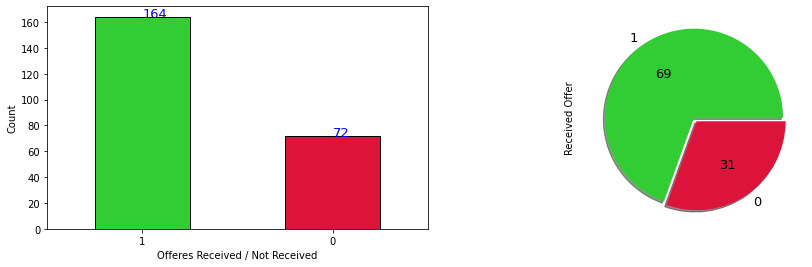

In [19]:
# Offers received
print(shark_tank['Received Offer'].value_counts(), "\n")
print(round(shark_tank['Received Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15,9))
ax1 = plt.subplot(221)
shark_tank["Received Offer"].value_counts().plot(kind='bar', color=["limegreen","crimson"], ec="k")
plt.xlabel("Offeres Received / Not Received")
plt.ylabel("Count")
plt.xticks(rotation=0)
for x,y in enumerate(shark_tank["Received Offer"].value_counts()):
    plt.annotate(y, (x,y), fontsize=13, color="blue")
    
ax2 = plt.subplot(222)
shark_tank["Received Offer"].value_counts().plot(kind='pie', autopct='%.0f', explode = (0,0.05), colors=["limegreen","crimson"], shadow=True, fontsize=13)

# 132 companies received offers & 64 startups could not convince #Sharks to invest.

### ＄ 79% companies accepted offers and 21% startups didn't accept Sharks offer

1    129
0     35
Name: Accepted Offer, dtype: Int64 

1    79%
0    21%
Name: Accepted Offer, dtype: object


<AxesSubplot:ylabel='Accepted Offer'>

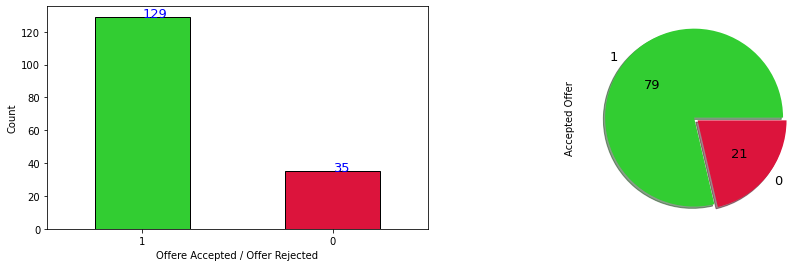

In [20]:
# Offers accepted
print(shark_tank['Accepted Offer'].value_counts(), "\n")
print(round(shark_tank['Accepted Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15, 9))
ax1 = plt.subplot(221)
shark_tank["Accepted Offer"].value_counts().plot(kind='bar', color=["limegreen","crimson"], ec="k")
plt.xlabel("Offere Accepted / Offer Rejected")
plt.ylabel("Count")
plt.xticks(rotation = 0)
for x,y in enumerate(shark_tank["Accepted Offer"].value_counts()):
    plt.annotate(y, (x,y), fontsize=13, color="blue")
    
ax2 = plt.subplot(222)
shark_tank["Accepted Offer"].value_counts().plot(kind='pie', autopct='%.0f', explode = (0,0.05), colors=["limegreen","crimson"], shadow=True, fontsize=13)

# 103 companies accepted investments they got & 29 #Startups did not accept Shark's offer.

## ❗ Shark Tank India data set Visualizations/infographics in Tableau Public —
### https://public.tableau.com/app/profile/satya.thirumani/viz/SharkTankIndia_16448181343920/SharkTankIndiaStory

In [21]:
IFrame('https://public.tableau.com/views/SharkTankIndia_16448181343920/SharkTankIndiaStory', width=1100, height=1000)

In [22]:
# Maximum amount requested
print("Rs.", round(shark_tank["Original Ask Amount"].max()/100), "crores")

Rs. 300 crores


In [23]:
# Least amount requested
print("Rs.", round(shark_tank["Original Ask Amount"].min()*100000))

Rs. 5


In [24]:
# Offers rejected by pitchers/startup companies
shark_tank.loc[shark_tank['Accepted Offer']==0, ["Startup Name","Industry","Original Ask Amount","Original Offered Equity"]]

Startup Name              Industry  Original Ask Amount  \
6            qZenseLabs                  Food                100.0   
19             Torch-it             Education                 75.0   
21          LaKheerDeli                  Food                 50.0   
27        KabiraHandmad                  Food                100.0   
41     MorrikoPureFoods                  Food                100.0   
55       IndiaHempandCo                  Food                 50.0   
60            KetoIndia                  Food                150.0   
70            Moonshine                  Food                 80.0   
71              Falhari                  Food                 50.0   
73          UrbanMonkey        Beauty/Fashion                100.0   
74        GuardianGears         Manufacturing                 30.0   
81               Alpino                  Food                150.0   
87   AlisteTechnologies            Technology                 60.0   
93            PDDFalcon         Manufacturing                 75.0   
94            PlayBoxTV              Services                100.0   
104      ExperentialEtc            Technology                200.0   
106          C3Med-Tech               Medical                 35.0   
113        GreenProtein                  Food                 60.0   
116               Woloo            Technology                 50.0   
119         FrenchCrown        Beauty/Fashion                150.0   
121            Devnagri            Technology                100.0   
131           Scintiglo               Medical                 75.0   
135           UrbanNaps              Services                 50.0   
138            Picsniff            Technology                 55.0   
149             Artment        Beauty/Fashion                170.0   
151                Eume        Beauty/Fashion                150.0   
158          ATMOSPHERE                  Food                 75.0   
165           Flatheads        Beauty/Fashion                 75.0   
189             Diabexy                  Food                150.0   
199        AvimeeHerbal        Beauty/Fashion                280.0   
206                 PMV   Electrical Vehicles                100.0   
212      CheeseCake&Co.                  Food                100.0   
215              BeUnic              Services                100.0   
229          GavinParis        Beauty/Fashion                 50.0   
233          HobbyIndia  Furnishing/Household                 50.0   

     Original Offered Equity  
6                       0.25  
19                      1.00  
21                      7.50  
27                      5.00  
41                      3.00  
55                      4.00  
60                      1.25  
70                      0.50  
71                      2.00  
73                      1.00  
74                      5.00  
81                      2.00  
87                      5.00  
93                      3.00  
94                      3.50  
104                     4.00  
106                     6.00  
113                     2.00  
116                     4.00  
119                     0.33  
121                     1.00  
131                     1.00  
135                     4.00  
138                     1.00  
149                     2.50  
151                     2.00  
158                     3.00  
165                     3.00  
189                     1.00  
199                     0.50  
206                     1.00  
212                     2.00  
215                    10.00  
229                     5.00  
233                     3.00

In [25]:
# Sum of investment amount asked by all startup companies, in Shark Tank, in India
print(format_currency(shark_tank['Original Ask Amount'].sum()/100, 'INR', locale='en_IN').replace(".00", ""), "crores")

₹466.46 crores


In [26]:
# Sum of amount invested by all sharks, in Shark Tank India
print(format_currency(shark_tank['Total Deal Amount'].sum()/100, 'INR', locale='en_IN').replace(".00", ""), "crores")

₹80.37 crores


In [27]:
# Sum of loan/debt amount given by all sharks, in India Shark Tank
print(format_currency(shark_tank['Total Deal Debt'].sum()/100, 'INR', locale='en_IN').replace(".00", ""), "crores")

₹10.07 crores


In [28]:
# Top 20 investments, as per total investment/deal amount (in lakhs)
print(shark_tank.groupby('Startup Name')['Total Deal Amount'].max().nlargest(20))

tmpdf = shark_tank.sort_values('Total Deal Amount', ascending=False)[0:20]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Amount', color="Startup Name", title="Highest Investment as per deal amount (in lakhs)", text=tmpdf['Total Deal Amount'].map(int).map(str) + " lakhs")
fig.show()

Startup Name
UnStop               200.0
AasVidyalaya         150.0
Portl                150.0
Snitch               150.0
Stage                150.0
Annie                105.0
Broomees             100.0
GearHeadMotors       100.0
Geeani               100.0
Get-A-Whey           100.0
HammerLifestyle      100.0
Haqdarshak           100.0
Hoovu                100.0
HumpyA2              100.0
INACAN               100.0
InsuranceSamadhan    100.0
Janitri              100.0
NeoMotion            100.0
PadCare              100.0
Proxgy               100.0
Name: Total Deal Amount, dtype: float64


In [29]:
# Top 10 investments, as per total equity/shares percentage
print(shark_tank.groupby('Startup Name')['Total Deal Equity'].max().nlargest(10))

tmpdf = shark_tank.sort_values('Total Deal Equity', ascending=False)[0:10]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Highest Investment as per Equity percentage", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show()

Startup Name
Sid07Designs          75.00
BoozScooters          50.00
IsakFragrances        50.00
HammerLifestyle       40.00
KGAgrotech            40.00
TheSassBar            35.00
VivalyfInnovations    33.33
GoldSafeSolutions     30.00
HeartUpMySleeves      30.00
JainShikanji          30.00
Name: Total Deal Equity, dtype: float64


In [30]:
# Top 8 investments, as per total debt/loan amount
print(shark_tank.groupby('Startup Name')['Total Deal Debt'].max().nlargest(8))

tmpdf = shark_tank.sort_values('Total Deal Debt', ascending=False)[0:8]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Debt', color="Startup Name", title="Highest Investment as per Debt amount (in lakhs)", text=tmpdf['Total Deal Debt'].map(int).map(str) + " lakhs")
fig.show()

Startup Name
Stage                150.0
WatchoutWearables    100.0
Otua                  99.0
AyuSynk               50.0
DailyDump             50.0
Freebowler            50.0
NamhyaFoods           50.0
StoreMyGoods          50.0
Name: Total Deal Debt, dtype: float64


In [31]:
# Startups who got Debt/loan amount
shark_tank.loc[shark_tank['Total Deal Debt'] > 0][["Startup Name","Original Ask Amount","Total Deal Amount","Total Deal Equity","Total Deal Debt"]]

Startup Name  Original Ask Amount  Total Deal Amount  \
8                 NOCD                 50.0               20.0   
44                 PNT                 50.0               25.0   
46         BambooIndia                 80.0               50.0   
56                Otua                100.0                1.0   
62       TheStatePlate                 65.0               40.0   
66        Sid07Designs                 47.0               25.0   
72         NamhyaFoods                100.0               50.0   
77          KGAgrotech                 30.0               10.0   
120       StoreMyGoods                100.0               50.0   
156  WatchoutWearables                200.0              100.0   
157              SoupX                 75.0               50.0   
159              Stage                300.0              150.0   
163        Brandsdaddy                 70.0               35.0   
172            AyuSynk                100.0               50.0   
180         Freebowler                 75.0               25.0   
183          DailyDump                 80.0               30.0   
196             VSMani                 60.0               19.0   
201             ekatra                 40.0               20.0   
204          licksters                 50.0               25.0   
213             Dabble                 50.0               15.0   
218          HoneyVeda                 75.0               50.0   
220  SwadeshiBlessings                 50.0               25.0   
231            BlueTea                 75.0               50.0   

     Total Deal Equity  Total Deal Debt  
8                 15.0             30.0  
44                25.0             25.0  
46                 3.5             30.0  
56                 1.0             99.0  
62                 3.0             25.0  
66                75.0             22.0  
72                10.0             50.0  
77                40.0             20.0  
120                4.0             50.0  
156               10.0            100.0  
157               18.0             25.0  
159                0.6            150.0  
163                5.0             35.0  
172                3.5             50.0  
180                7.5             50.0  
183                4.0             50.0  
196                1.0             41.0  
201               20.0             20.0  
204                5.0             25.0  
213               10.0             35.0  
218               20.0             25.0  
220                5.0             25.0  
231                3.0             25.0

## 💰 Which shark invested most ?

In [32]:
# Maximum Investment - as per Investment Amount
print("Maximum Investment - as per Investment Amount")
print("Aman invested in Season 1 -", round(max(shark_tank_season1['Ashneer Investment Amount'].sum()/100, shark_tank_season1['Namita Investment Amount'].sum()/100, shark_tank_season1['Anupam Investment Amount'].sum()/100, shark_tank_season1['Vineeta Investment Amount'].sum()/100,
    shark_tank_season1['Aman Investment Amount'].sum()/100, shark_tank_season1['Peyush Investment Amount'].sum()/100, shark_tank_season1['Ghazal Investment Amount'].sum()/100, shark_tank_season1['Amit Investment Amount'].sum()/100),2), "crores")
print("Aman invested in Season 2 -", round(max(shark_tank_season2['Namita Investment Amount'].sum()/100, shark_tank_season2['Anupam Investment Amount'].sum()/100, shark_tank_season2['Vineeta Investment Amount'].sum()/100,
    shark_tank_season2['Aman Investment Amount'].sum()/100, shark_tank_season2['Peyush Investment Amount'].sum()/100, shark_tank_season2['Ghazal Investment Amount'].sum()/100, shark_tank_season2['Amit Investment Amount'].sum()/100),2), "crores")

Maximum Investment - as per Investment Amount
Aman invested in Season 1 - 8.97 crores
Aman invested in Season 2 - 8.56 crores


In [33]:
# Minimum Investment - as per Investment Amount
print("Minimum Investment - as per Investment Amount")
print("Ghazal invested in Season 1 -", round(min(shark_tank_season1['Ghazal Investment Amount'].sum()/100, shark_tank_season1['Namita Investment Amount'].sum()/100, shark_tank_season1['Anupam Investment Amount'].sum()/100, shark_tank_season1['Vineeta Investment Amount'].sum()/100,
    shark_tank_season1['Aman Investment Amount'].sum()/100, shark_tank_season1['Peyush Investment Amount'].sum()/100, shark_tank_season1['Ghazal Investment Amount'].sum()/100),2), "crores")
print("Amit invested in Season 2 -", round(min(shark_tank_season2['Amit Investment Amount'].sum()/100, shark_tank_season2['Namita Investment Amount'].sum()/100, shark_tank_season2['Anupam Investment Amount'].sum()/100, shark_tank_season2['Vineeta Investment Amount'].sum()/100,
    shark_tank_season2['Aman Investment Amount'].sum()/100, shark_tank_season2['Peyush Investment Amount'].sum()/100, shark_tank_season2['Amit Investment Amount'].sum()/100),2), "crores")

Minimum Investment - as per Investment Amount
Ghazal invested in Season 1 - 1.6 crores
Amit invested in Season 2 - 3.81 crores


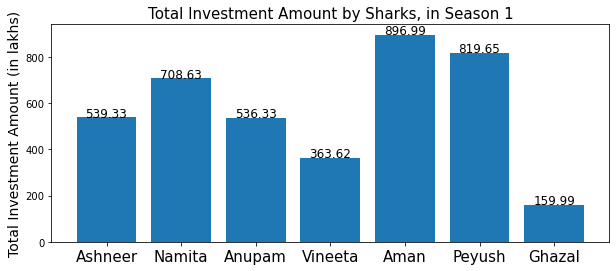

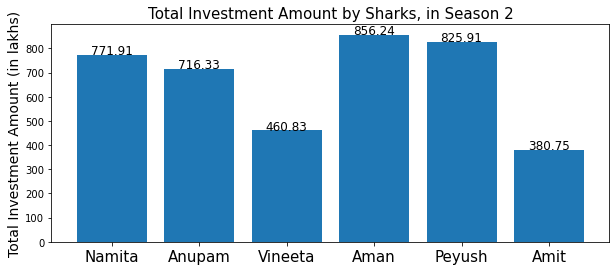

In [34]:
# Amount received by sharks
# Season 1
Amount = [shark_tank_season1['Ashneer Investment Amount'].sum(), shark_tank_season1['Namita Investment Amount'].sum(), shark_tank_season1['Anupam Investment Amount'].sum(), shark_tank_season1['Vineeta Investment Amount'].sum(),
    shark_tank_season1['Aman Investment Amount'].sum(), shark_tank_season1['Peyush Investment Amount'].sum(), shark_tank_season1['Ghazal Investment Amount'].sum()]
name=['Ashneer','Namita','Anupam','Vineeta','Aman','Peyush','Ghazal']
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'])
plt.xticks(fontsize=15)
plt.ylabel("Total Investment Amount (in lakhs)",fontsize=14)
for index,d in enumerate(Amount):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Investment Amount by Sharks, in Season 1", fontsize=15)
plt.show()

# Season 2
Amount = [shark_tank_season2['Namita Investment Amount'].sum(), shark_tank_season2['Anupam Investment Amount'].sum(), shark_tank_season2['Vineeta Investment Amount'].sum(),
    shark_tank_season2['Aman Investment Amount'].sum(), shark_tank_season2['Peyush Investment Amount'].sum(), shark_tank_season2['Amit Investment Amount'].sum()]
name=['Namita','Anupam','Vineeta','Aman','Peyush','Amit']
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'])
plt.xticks(fontsize=15)
plt.ylabel("Total Investment Amount (in lakhs)",fontsize=14)
for index,d in enumerate(Amount):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Investment Amount by Sharks, in Season 2", fontsize=15)
plt.show()

In [35]:
# Maximum Equity - who received maximum shares
print("Maximum Equity - who received maximum shares")
print("Peyush got equity of -", round(max(shark_tank_season1['Ashneer Investment Equity'].sum(), shark_tank_season1['Namita Investment Equity'].sum(), shark_tank_season1['Anupam Investment Equity'].sum(), shark_tank_season1['Vineeta Investment Equity'].sum(),
    shark_tank_season1['Aman Investment Equity'].sum(), shark_tank_season1['Peyush Investment Equity'].sum(), shark_tank_season1['Ghazal Investment Equity'].sum()),2), "% in different companies, in season 1")
print("Anupam got equity of -", round(max(shark_tank_season2['Ashneer Investment Equity'].sum(), shark_tank_season2['Namita Investment Equity'].sum(), shark_tank_season2['Anupam Investment Equity'].sum(), shark_tank_season2['Vineeta Investment Equity'].sum(),
    shark_tank_season2['Aman Investment Equity'].sum(), shark_tank_season2['Peyush Investment Equity'].sum(), shark_tank_season2['Amit Investment Equity'].sum()),2), "% in different companies, in season 2")

Maximum Equity - who received maximum shares
Peyush got equity of - 322.84 % in different companies, in season 1
Anupam got equity of - 111.63 % in different companies, in season 2


In [36]:
# Minimum Equity - who received least amount of shares
print("Minimum Equity - who received least amount of shares")
print("Ghazal got equity of -", round(min(shark_tank_season1['Ashneer Investment Equity'].sum(), shark_tank_season1['Namita Investment Equity'].sum(), shark_tank_season1['Anupam Investment Equity'].sum(), shark_tank_season1['Vineeta Investment Equity'].sum(),
    shark_tank_season1['Aman Investment Equity'].sum(), shark_tank_season1['Peyush Investment Equity'].sum(), shark_tank_season1['Ghazal Investment Equity'].sum()),2), "% in different companies, in season 1")
print("Amit got equity of -", round(min(shark_tank_season2['Namita Investment Equity'].sum(), shark_tank_season2['Anupam Investment Equity'].sum(), shark_tank_season2['Vineeta Investment Equity'].sum(),
    shark_tank_season2['Aman Investment Equity'].sum(), shark_tank_season2['Peyush Investment Equity'].sum(), shark_tank_season2['Amit Investment Equity'].sum()),2), "% in different companies, in season 2")

Minimum Equity - who received least amount of shares
Ghazal got equity of - 51.7 % in different companies, in season 1
Amit got equity of - 59.25 % in different companies, in season 2


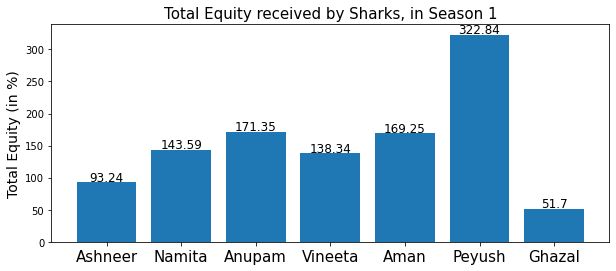

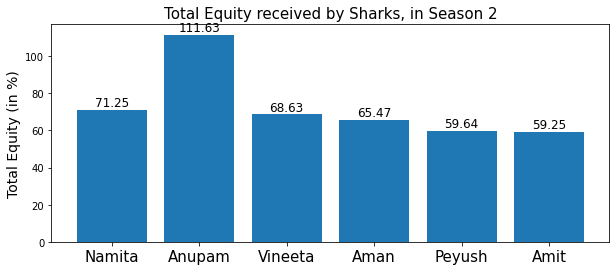

In [37]:
# Equity received by sharks, in Season 1
# Season 1
Equity = [shark_tank_season1['Ashneer Investment Equity'].sum(), shark_tank_season1['Namita Investment Equity'].sum(), shark_tank_season1['Anupam Investment Equity'].sum(), shark_tank_season1['Vineeta Investment Equity'].sum(),
    shark_tank_season1['Aman Investment Equity'].sum(), shark_tank_season1['Peyush Investment Equity'].sum(), shark_tank_season1['Ghazal Investment Equity'].sum()]
name=['Ashneer','Namita','Anupam','Vineeta','Aman','Peyush','Ghazal']
df = {'Name':name, 'Total Equity':Equity}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Equity'])
plt.xticks(fontsize=15)
plt.ylabel("Total Equity (in %)",fontsize=14)
for index,d in enumerate(Equity):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Equity received by Sharks, in Season 1", fontsize=15)
plt.show()

# Season 2
Equity = [shark_tank_season2['Namita Investment Equity'].sum(), shark_tank_season2['Anupam Investment Equity'].sum(), shark_tank_season2['Vineeta Investment Equity'].sum(),
    shark_tank_season2['Aman Investment Equity'].sum(), shark_tank_season2['Peyush Investment Equity'].sum(), shark_tank_season2['Amit Investment Equity'].sum()]
name=['Namita','Anupam','Vineeta','Aman','Peyush','Amit']
df = {'Name':name, 'Total Equity':Equity}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Equity'])
plt.xticks(fontsize=15)
plt.ylabel("Total Equity (in %)",fontsize=14)
for index,d in enumerate(Equity):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Equity received by Sharks, in Season 2", fontsize=15)
plt.show()

In [38]:
# Maximum Investment - as per Debt/loaned Amount
print("Maximum Investment - as per Debt/loaned Amount")
print("Peyush gave loan of -", round(max(shark_tank_season1['Ashneer Debt Amount'].sum()/100, shark_tank_season1['Namita Debt Amount'].sum()/100, shark_tank_season1['Anupam Debt Amount'].sum()/100, shark_tank_season1['Vineeta Debt Amount'].sum()/100,
    shark_tank_season1['Aman Debt Amount'].sum()/100, shark_tank_season1['Peyush Debt Amount'].sum()/100, shark_tank_season1['Ghazal Debt Amount'].sum()/100),2), "crores, in season 1")
print("Namita gave loan of -", round(max(shark_tank_season2['Namita Debt Amount'].sum()/100, shark_tank_season2['Anupam Debt Amount'].sum()/100, shark_tank_season2['Vineeta Debt Amount'].sum()/100,
    shark_tank_season2['Aman Debt Amount'].sum()/100, shark_tank_season2['Peyush Debt Amount'].sum()/100, shark_tank_season2['Amit Debt Amount'].sum()/100),2), "crores, in season 2")

Maximum Investment - as per Debt/loaned Amount
Peyush gave loan of - 1.17 crores, in season 1
Namita gave loan of - 2.88 crores, in season 2


In [39]:
# Minimum Investment - as per Debt/loaned Amount
print("Minimum Investment - as per Debt/loaned Amount")
print("Ghazal gave loan of -", round(min(shark_tank_season1['Ashneer Debt Amount'].sum()/100, shark_tank_season1['Namita Debt Amount'].sum()/100, shark_tank_season1['Anupam Debt Amount'].sum()/100, shark_tank_season1['Vineeta Debt Amount'].sum()/100,
    shark_tank_season1['Aman Debt Amount'].sum()/100, shark_tank_season1['Peyush Debt Amount'].sum()/100, shark_tank_season1['Ghazal Debt Amount'].sum()/100),2), "crores, in season 1")
print("Amit gave loan of -", round(min(shark_tank_season2['Namita Debt Amount'].sum()/100, shark_tank_season2['Anupam Debt Amount'].sum()/100, shark_tank_season2['Vineeta Debt Amount'].sum()/100,
    shark_tank_season2['Aman Debt Amount'].sum()/100, shark_tank_season2['Peyush Debt Amount'].sum()/100, shark_tank_season2['Amit Debt Amount'].sum()/100),2), "crores, in season 2")

Minimum Investment - as per Debt/loaned Amount
Ghazal gave loan of - 0.0 crores, in season 1
Amit gave loan of - 0.35 crores, in season 2


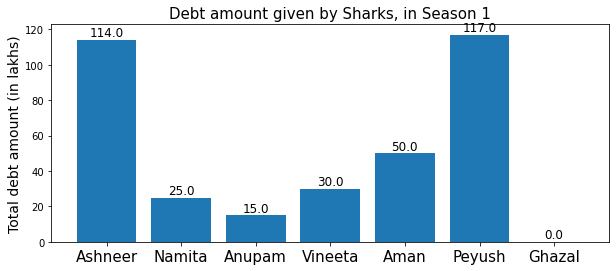

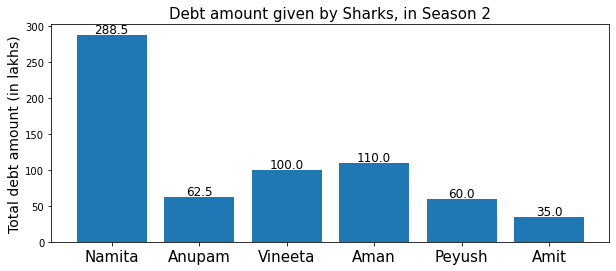

In [40]:
# Investment based on the  Debt/loaned Amount
# Season 1
debt = [shark_tank_season1['Ashneer Debt Amount'].sum(), shark_tank_season1['Namita Debt Amount'].sum(), shark_tank_season1['Anupam Debt Amount'].sum(), shark_tank_season1['Vineeta Debt Amount'].sum(),
    shark_tank_season1['Aman Debt Amount'].sum(), shark_tank_season1['Peyush Debt Amount'].sum(), shark_tank_season1['Ghazal Debt Amount'].sum()]
name=['Ashneer','Namita','Anupam','Vineeta','Aman','Peyush','Ghazal']
df = {'Name':name, 'Total debt':debt}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total debt'])
plt.xticks(fontsize=15)
plt.ylabel("Total debt amount (in lakhs)",fontsize=14)
for index,d in enumerate(debt):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Debt amount given by Sharks, in Season 1", fontsize=15)
plt.show()

# Season 2
debt = [shark_tank_season2['Namita Debt Amount'].sum(), shark_tank_season2['Anupam Debt Amount'].sum(), shark_tank_season2['Vineeta Debt Amount'].sum(),
    shark_tank_season2['Aman Debt Amount'].sum(), shark_tank_season2['Peyush Debt Amount'].sum(), shark_tank_season2['Amit Debt Amount'].sum()]
name=['Namita','Anupam','Vineeta','Aman','Peyush','Amit']
df = {'Name':name, 'Total debt':debt}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total debt'])
plt.xticks(fontsize=15)
plt.ylabel("Total debt amount (in lakhs)",fontsize=14)
for index,d in enumerate(debt):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Debt amount given by Sharks, in Season 2", fontsize=15)
plt.show()

## 📊 BIGG BOSS Dataset https://www.kaggle.com/datasets/thirumani/bigg-boss-india-hindi-telugu-tamil-kannada

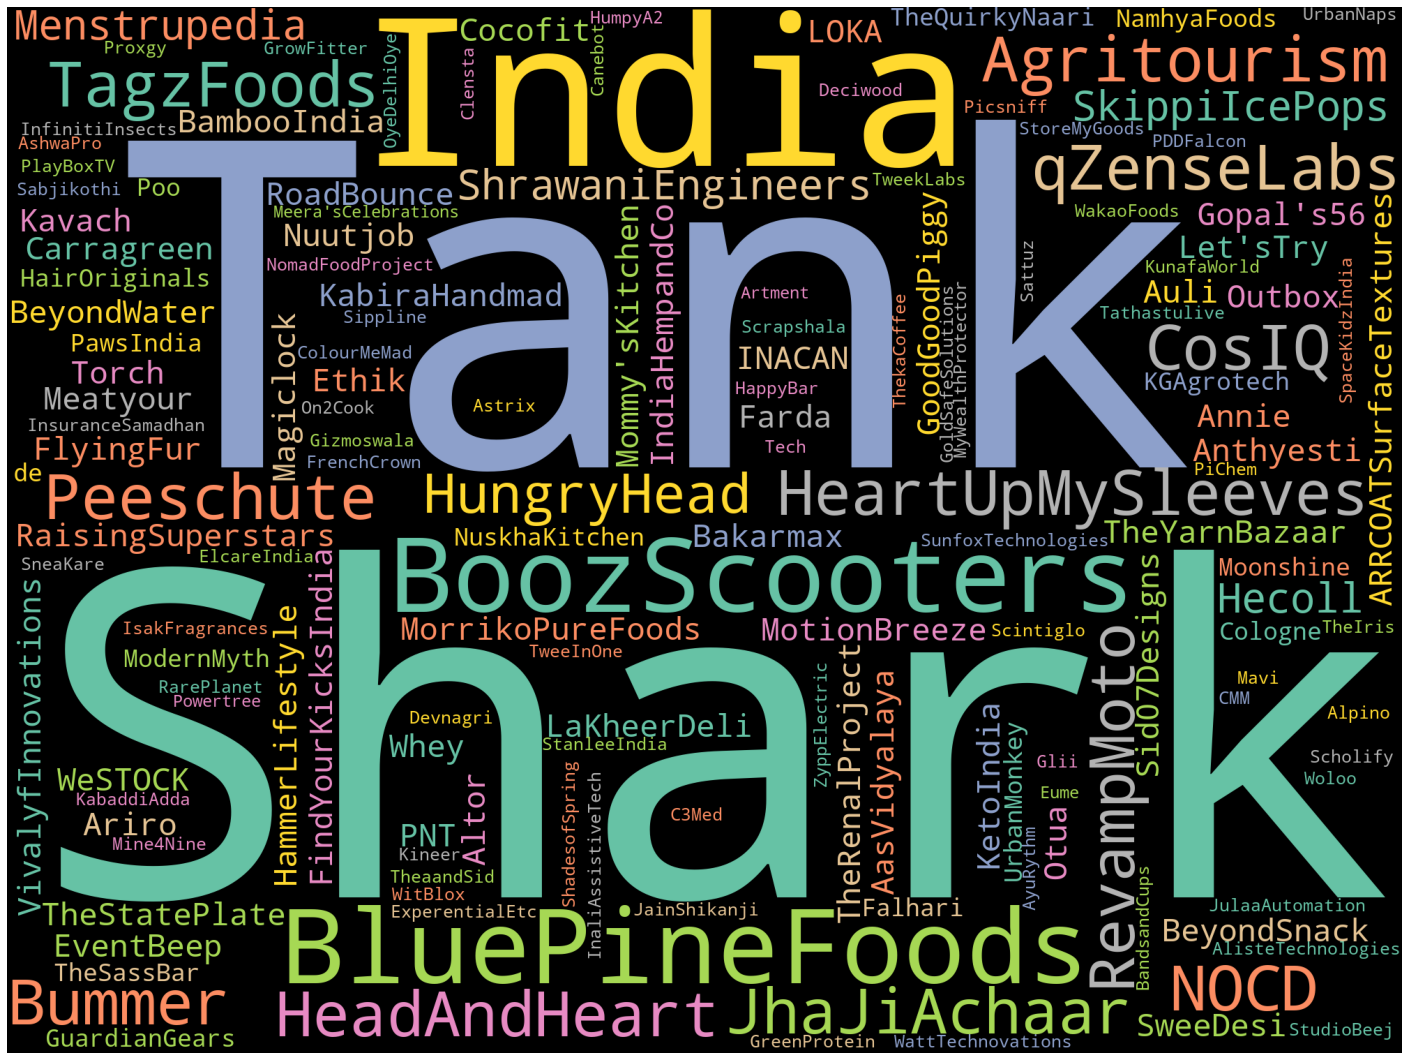

In [41]:
# Word cloud based on Startup Names, in season 1
text = " Shark Tank India ".join(cat for cat in shark_tank_season1['Startup Name'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='black', colormap='Set2', collocations=False, random_state=2023).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

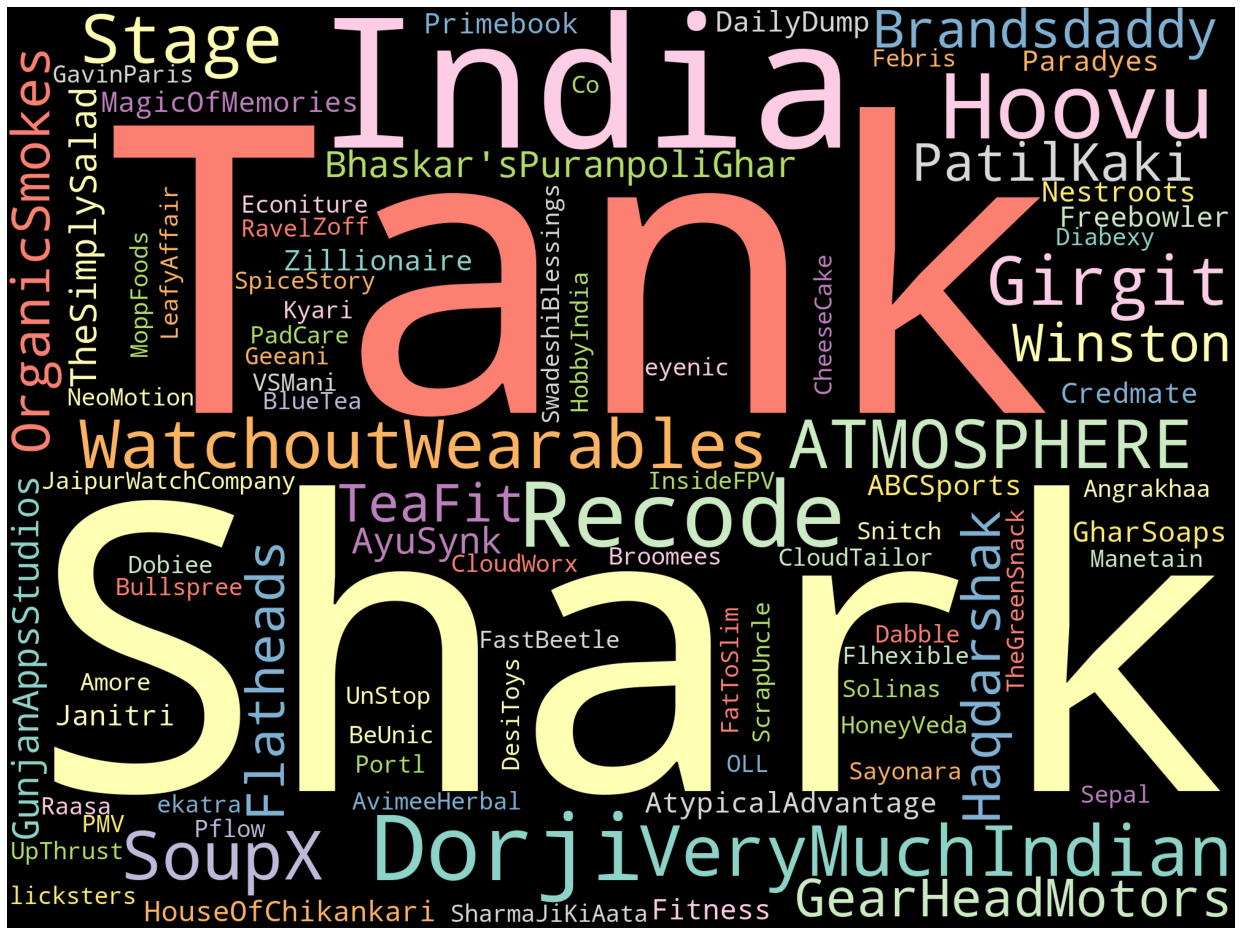

In [42]:
# Word cloud based on Startup Names, in season 2
text = " Shark Tank India ".join(cat for cat in shark_tank_season2['Startup Name'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='black', colormap='Set3', collocations=False, random_state=2023).generate(text)
plt.figure(figsize=(22,18))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 🔥 Ashneer Grover's Investments

Total investments by Ashneer 21
Investment amount by Ashneer 5.39 crores
Equity received by Ashneer 93.24 % in different companies
Debt/loan amount by Ashneer 1.14 crores

---------------------------------------------------------------------------
      Startup Name            Industry  Ashneer Investment Amount
     BluePineFoods                Food                      25.00
      BoozScooters Electrical Vehicles                      20.00
         TagzFoods                Food                      70.00
     SkippiIcePops                Food                      20.00
 RaisingSuperstars           Education                      50.00
       BeyondSnack                Food                      25.00
      MotionBreeze Electrical Vehicles                      30.00
         EventBeep           Education                      10.00
     TheYarnBazaar       Manufacturing                      25.00
       BambooIndia       Manufacturing                      25.00
FindYourKicksIndia      Be

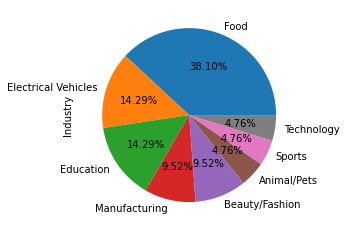

In [43]:
print("Total investments by Ashneer", shark_tank[shark_tank['Ashneer Investment Amount']>0][['Ashneer Investment Amount']].count().to_string()[-2:])
print("Investment amount by Ashneer", round(shark_tank['Ashneer Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Ashneer", round(shark_tank['Ashneer Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Ashneer", round(shark_tank['Ashneer Debt Amount'].sum()/100, 2), "crores\n")

print('-'*75)
print(shark_tank.loc[shark_tank['Ashneer Investment Amount']>0][["Startup Name","Industry","Ashneer Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nAshneer industry wise investments\n")
print(shark_tank[shark_tank['Ashneer Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Ashneer Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Ashneer Investment Amount']>0] [["Startup Name","Ashneer Investment Amount","Ashneer Investment Equity"]].sort_values(by="Ashneer Investment Equity")
fig = px.bar(tmpdf, x="Ashneer Investment Equity", y='Ashneer Investment Amount', color="Startup Name", title="<b>Total equity received by Ashneer (in %) for investment (in lakhs)</b>", text=tmpdf['Ashneer Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## 🎆 Namita Thapar's Investments

Total investments by Namita 46
Investment amount by Namita 14.81 crores
Equity received by Namita 214.84 % in different companies
Debt/loan amount by Namita 3.14 crores

---------------------------------------------------------------------------
      Startup Name             Industry  Namita Investment Amount
       JhaJiAchaar                 Food                 28.300000
            Bummer       Beauty/Fashion                 37.500000
     SkippiIcePops                 Food                 20.000000
      Menstrupedia            Education                 50.000000
             Altor        Manufacturing                 25.000000
           Nuutjob       Beauty/Fashion                  8.330000
             Farda       Beauty/Fashion                 15.000000
              Auli       Beauty/Fashion                 75.000000
             Annie            Education                 35.000000
   TheRenalProject              Medical                 50.000000
           Cocofit          

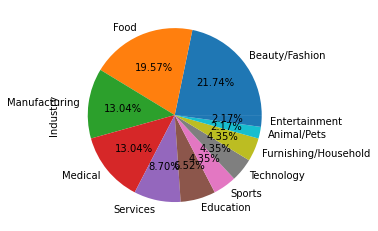

In [44]:
print("Total investments by Namita", shark_tank[shark_tank['Namita Investment Amount']>0][['Namita Investment Amount']].count().to_string()[-2:])
print("Investment amount by Namita", round(shark_tank['Namita Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Namita", round(shark_tank['Namita Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Namita", round(shark_tank['Namita Debt Amount'].sum()/100, 2), "crores\n")

print('-'*75)
print(shark_tank.loc[shark_tank['Namita Investment Amount']>0][["Startup Name","Industry","Namita Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nNamita industry wise investments\n")
print(shark_tank[shark_tank['Namita Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Namita Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Namita Investment Amount']>0] [["Startup Name","Namita Investment Amount","Namita Investment Equity"]].sort_values(by="Namita Investment Equity")
fig = px.bar(tmpdf, x="Namita Investment Equity", y='Namita Investment Amount', color="Startup Name", title="<b>Total equity received by Namita (in %) for investment (in lakhs)</b>", text=tmpdf['Namita Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## ㊂ Anupam Mittal's Investments

Total investments by Anupam 42
Investment amount by Anupam 12.53 crores
Equity received by Anupam 282.98 % in different companies
Debt/loan amount by Anupam 0.78 crores

---------------------------------------------------------------------------
          Startup Name            Industry  Anupam Investment Amount
      HeartUpMySleeves      Beauty/Fashion                 12.500000
                 CosIQ      Beauty/Fashion                 25.000000
            RevampMoto Electrical Vehicles                 50.000000
         SkippiIcePops                Food                 20.000000
                Kavach           Education                  2.500000
    VivalyfInnovations             Medical                 28.000000
              Meatyour                Food                 10.000000
ARRCOATSurfaceTextures       Manufacturing                 50.000000
                  LOKA          Technology                 13.330000
                 Annie           Education                 35.00

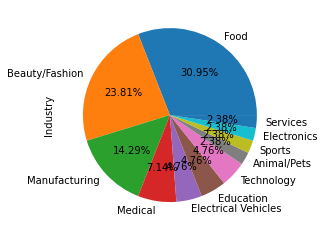

In [45]:
print("Total investments by Anupam", shark_tank[shark_tank['Anupam Investment Amount']>0][['Anupam Investment Amount']].count().to_string()[-2:])
print("Investment amount by Anupam", round(shark_tank['Anupam Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Anupam", round(shark_tank['Anupam Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Anupam", round(shark_tank['Anupam Debt Amount'].sum()/100, 2), "crores\n")

print('-'*75)
print(shark_tank.loc[shark_tank['Anupam Investment Amount']>0][["Startup Name","Industry","Anupam Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nAnupam industry wise investments\n")
print(shark_tank[shark_tank['Anupam Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Anupam Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Anupam Investment Amount']>0] [["Startup Name","Anupam Investment Amount","Anupam Investment Equity"]].sort_values(by="Anupam Investment Equity")
fig = px.bar(tmpdf, x="Anupam Investment Equity", y='Anupam Investment Amount', color="Startup Name", title="<b>Total equity received by Anupam (in %) for investment (in lakhs)</b>", text=tmpdf['Anupam Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## 🎇 Vineeta Singh's Investments
#### Vineeta's portfolio has 48% Food industry and 22% Beauty/Fashion industry

Total investments by Vineeta 31
Investment amount by Vineeta 8.24 crores
Equity received by Vineeta 206.97 % in different companies
Debt/loan amount by Vineeta 1.3 crores

---------------------------------------------------------------------------
      Startup Name             Industry  Vineeta Investment Amount
     BluePineFoods                 Food                      25.00
      BoozScooters  Electrical Vehicles                      20.00
  HeartUpMySleeves       Beauty/Fashion                      12.50
              NOCD                 Food                      20.00
             CosIQ       Beauty/Fashion                      25.00
       JhaJiAchaar                 Food                      28.30
     SkippiIcePops                 Food                      20.00
        Get-A-Whey                 Food                      33.33
    TheQuirkyNaari       Beauty/Fashion                      17.50
SunfoxTechnologies              Medical                      20.00
           Hump

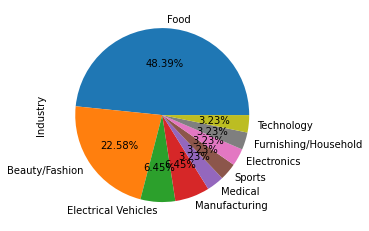

In [46]:
print("Total investments by Vineeta", shark_tank[shark_tank['Vineeta Investment Amount']>0][['Vineeta Investment Amount']].count().to_string()[-2:])
print("Investment amount by Vineeta", round(shark_tank['Vineeta Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Vineeta", round(shark_tank['Vineeta Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Vineeta", round(shark_tank['Vineeta Debt Amount'].sum()/100, 2), "crores\n")

print('-'*75)
print(shark_tank.loc[shark_tank['Vineeta Investment Amount']>0][["Startup Name","Industry","Vineeta Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nVineeta industry wise investments\n")
print(shark_tank[shark_tank['Vineeta Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Vineeta Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Vineeta Investment Amount']>0] [["Startup Name","Vineeta Investment Amount","Vineeta Investment Equity"]].sort_values(by="Vineeta Investment Equity")
fig = px.bar(tmpdf, x="Vineeta Investment Equity", y='Vineeta Investment Amount', color="Startup Name", title="<b>Total equity received by Vineeta (in %) for investment (in lakhs)</b>", text=tmpdf['Vineeta Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## 🚀 Aman Gupta's Investments

Total investments by Aman 53
Investment amount by Aman 17.53 crores
Equity received by Aman 234.71 % in different companies
Debt/loan amount by Aman 1.6 crores

---------------------------------------------------------------------------
      Startup Name            Industry  Aman Investment Amount
     BluePineFoods                Food               25.000000
         Peeschute      Beauty/Fashion               75.000000
            Bummer      Beauty/Fashion               37.500000
        RevampMoto Electrical Vehicles               50.000000
     SkippiIcePops                Food               20.000000
 RaisingSuperstars           Education               50.000000
            Kavach           Education                2.500000
       BeyondSnack                Food               25.000000
             Altor       Manufacturing               25.000000
             Ariro       Manufacturing               25.000000
           Nuutjob      Beauty/Fashion                8.330000
       

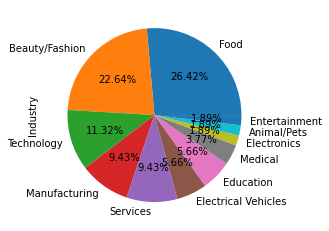

In [47]:
print("Total investments by Aman", shark_tank[shark_tank['Aman Investment Amount']>0][['Aman Investment Amount']].count().to_string()[-2:])
print("Investment amount by Aman", round(shark_tank['Aman Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Aman", round(shark_tank['Aman Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Aman", round(shark_tank['Aman Debt Amount'].sum()/100, 2), "crores\n")

print('-'*75)
print(shark_tank.loc[shark_tank['Aman Investment Amount']>0][["Startup Name","Industry","Aman Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nAman industry wise investments\n")
print(shark_tank[shark_tank['Aman Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Aman Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Aman Investment Amount']>0] [["Startup Name","Aman Investment Amount","Aman Investment Equity"]].sort_values(by="Aman Investment Equity")
fig = px.bar(tmpdf, x="Aman Investment Equity", y='Aman Investment Amount', color="Startup Name", title="<b>Total equity received by Aman (in %) for investment (in lakhs)</b>", text=tmpdf['Aman Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## 🎾 Peyush Bansal's Investments

Total investments by Peyush 52
Investment amount by Peyush 16.46 crores
Equity received by Peyush 382.48 % in different companies
Debt/loan amount by Peyush 1.77 crores

---------------------------------------------------------------------------
      Startup Name             Industry  Peyush Investment Amount
VivalyfInnovations              Medical                 28.000000
             Ariro        Manufacturing                 25.000000
           Nuutjob       Beauty/Fashion                  8.330000
          Meatyour                 Food                 10.000000
         EventBeep            Education                 10.000000
              LOKA           Technology                 13.330000
             Annie            Education                 35.000000
        Carragreen        Manufacturing                 25.000000
     TheYarnBazaar        Manufacturing                 25.000000
               PNT           Technology                 25.000000
FindYourKicksIndia       Bea

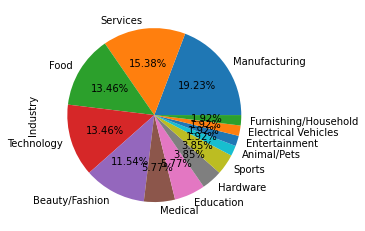

In [48]:
print("Total investments by Peyush", shark_tank[shark_tank['Peyush Investment Amount']>0][['Peyush Investment Amount']].count().to_string()[-2:])
print("Investment amount by Peyush", round(shark_tank['Peyush Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Peyush", round(shark_tank['Peyush Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Peyush", round(shark_tank['Peyush Debt Amount'].sum()/100, 2), "crores\n")

print('-'*75)
print(shark_tank.loc[shark_tank['Peyush Investment Amount']>0][["Startup Name","Industry","Peyush Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nPeyush industry wise investments\n")
print(shark_tank[shark_tank['Peyush Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Peyush Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Peyush Investment Amount']>0] [["Startup Name","Peyush Investment Amount","Peyush Investment Equity"]].sort_values(by="Peyush Investment Equity")
fig = px.bar(tmpdf, x="Peyush Investment Equity", y='Peyush Investment Amount', color="Startup Name", title="<b>Total equity received by Peyush (in %) for investment (in lakhs)</b>", text=tmpdf['Peyush Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## 🎯 Ghazal Alagh's Investments

Total investments by Ghazal  8
Investment amount by Ghazal 1.6 crores
Equity received by Ghazal 51.7 % in different companies
Debt/loan amount by Ghazal 0.0 crores

---------------------------------------------------------------------------
      Startup Name       Industry  Ghazal Investment Amount
        TheSassBar Beauty/Fashion                 25.000000
SunfoxTechnologies        Medical                 20.000000
 WattTechnovations        Medical                  0.000253
           HumpyA2           Food                 33.330000
 GoldSafeSolutions  Manufacturing                 16.660000
        WakaoFoods           Food                 25.000000
  NomadFoodProject           Food                 10.000000
           WitBlox  Manufacturing                 30.000000
---------------------------------------------------------------------------

Ghazal industry wise investments

Food              3
Medical           2
Manufacturing     2
Beauty/Fashion    1
Name: Industry, dtype: int64

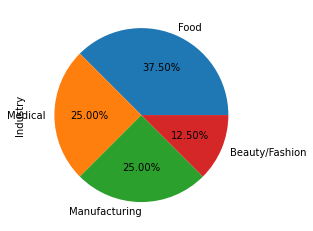

In [49]:
print("Total investments by Ghazal", shark_tank[shark_tank['Ghazal Investment Amount']>0][['Ghazal Investment Amount']].count().to_string()[-2:])
print("Investment amount by Ghazal", round(shark_tank['Ghazal Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Ghazal", round(shark_tank['Ghazal Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Ghazal", round(shark_tank['Ghazal Debt Amount'].sum()/100, 2), "crores\n")

print('-'*75)
print(shark_tank.loc[shark_tank['Ghazal Investment Amount']>0][["Startup Name","Industry","Ghazal Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nGhazal industry wise investments\n")
print(shark_tank[shark_tank['Ghazal Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Ghazal Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Ghazal Investment Amount']>0] [["Startup Name","Ghazal Investment Amount","Ghazal Investment Equity"]].sort_values(by="Ghazal Investment Equity")
fig = px.bar(tmpdf, x="Ghazal Investment Equity", y='Ghazal Investment Amount', color="Startup Name", title="<b>Total equity received by Ghazal (in %) for investment (in lakhs)</b>", text=tmpdf['Ghazal Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## ✳️ Amit Jain's Investments

Total investments by Amit  9
Investment amount by Amit 3.81 crores
Equity received by Amit 59.25 % in different companies
Debt/loan amount by Amit 0.35 crores

---------------------------------------------------------------------------
Startup Name             Industry  Amit Investment Amount
   InsideFPV        Manufacturing                   18.75
   Angrakhaa       Beauty/Fashion                   40.00
   MoppFoods                 Food                   75.00
      Dobiee                 Food                   72.00
       Pflow              Medical                   30.00
      ekatra Furnishing/Household                   10.00
   licksters                 Food                   25.00
  ScrapUncle             Services                   60.00
      UnStop           Technology                   50.00
---------------------------------------------------------------------------

Amit industry wise investments

Food                    3
Manufacturing           1
Beauty/Fashion         

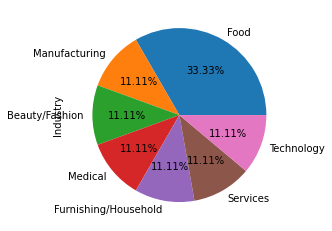

In [50]:
print("Total investments by Amit", shark_tank[shark_tank['Amit Investment Amount']>0][['Amit Investment Amount']].count().to_string()[-2:])
print("Investment amount by Amit", round(shark_tank['Amit Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Amit", round(shark_tank['Amit Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Amit", round(shark_tank['Amit Debt Amount'].sum()/100, 2), "crores\n")

print('-'*75)
print(shark_tank.loc[shark_tank['Amit Investment Amount']>0][["Startup Name","Industry","Amit Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nAmit industry wise investments\n")
print(shark_tank[shark_tank['Amit Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Amit Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Amit Investment Amount']>0] [["Startup Name","Amit Investment Amount","Amit Investment Equity"]].sort_values(by="Amit Investment Equity")
fig = px.bar(tmpdf, x="Amit Investment Equity", y='Amit Investment Amount', color="Startup Name", title="<b>Total equity received by Amit (in %) for investment (in lakhs)</b>", text=tmpdf['Amit Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

2.0    24
1.0    22
3.0    15
4.0     5
5.0     4
Name: Number of sharks in deal, dtype: int64 

2.0    34%
1.0    31%
3.0    21%
4.0     7%
5.0     6%
Name: Number of sharks in deal, dtype: object


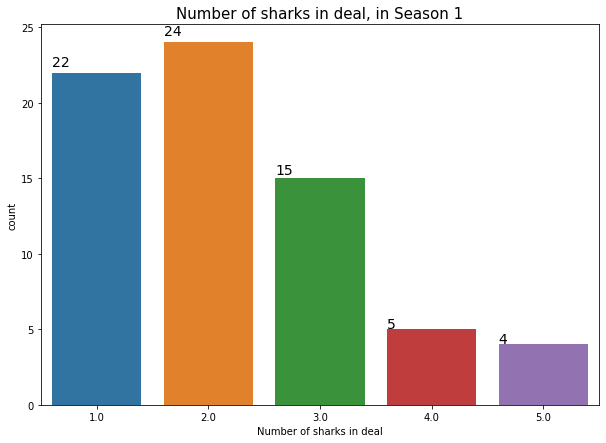

In [51]:
# Number of sharks in a deal, Season 1
print(shark_tank_season1['Number of sharks in deal'].value_counts(), "\n")

# In percentage
print(round(shark_tank_season1['Number of sharks in deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

fig = plt.figure(figsize=(10, 7))
plt.title("Number of sharks in deal, in Season 1", fontsize=15)
ax = sns.countplot(data = shark_tank_season1, x = 'Number of sharks in deal')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02), size=14)

1.0    28
2.0    20
3.0     6
4.0     4
5.0     1
Name: Number of sharks in deal, dtype: int64 

1.0    47%
2.0    34%
3.0    10%
4.0     7%
5.0     2%
Name: Number of sharks in deal, dtype: object


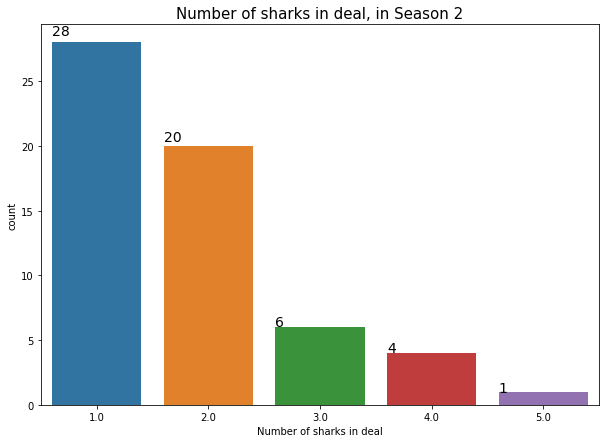

In [52]:
# Number of sharks in a deal, Season 2
print(shark_tank_season2['Number of sharks in deal'].value_counts(), "\n")

# In percentage
print(round(shark_tank_season2['Number of sharks in deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

fig = plt.figure(figsize=(10, 7))
plt.title("Number of sharks in deal, in Season 2", fontsize=15)
ax = sns.countplot(data = shark_tank_season2, x = 'Number of sharks in deal')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02), size=14)

In [53]:
# All sharks deals
print(shark_tank.loc[shark_tank['Number of sharks in deal'] >= 5][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]])

     Season Number        Startup Name  Total Deal Amount  Total Deal Equity
15               1       SkippiIcePops              100.0               15.0
50               1  FindYourKicksIndia               50.0               25.0
64               1              INACAN              100.0               10.0
80               1  SunfoxTechnologies              100.0                6.0
209              2              Snitch              150.0                1.5


In [54]:
print(shark_tank['Pitchers City'].value_counts(), "\n")

Delhi                 31
Mumbai                26
Bangalore             18
Pune                  15
Ahmedabad             12
Hyderabad              9
Multiple-Cities        9
Kolkata                7
Jaipur                 6
Gurgaon                6
Ludhiana               4
Chennai                4
Surat                  4
Gandhinagar            3
Noida                  3
Lucknow                2
Jammu                  2
Thane                  2
Indore                 2
Nagpur                 2
Amaravati              2
Faridabad              1
Shimla                 1
Bhagalpur              1
Darjeeling             1
Jamshedpur             1
Bengaluru              1
Alwar                  1
Madhubani              1
Shinde                 1
Srinagar               1
Modinagar              1
Dhule                  1
Coimbatore             1
Malegaon               1
Varanasi               1
Goa                    1
Mangalore              1
Dehradun               1
Mathura                1


In [55]:
print(shark_tank['Pitchers State'].value_counts(), "\n")

Maharashtra         53
Delhi               31
Gujarat             23
Karnataka           20
Multiple-States      9
Telangana            9
Uttar Pradesh        8
Haryana              8
Rajasthan            8
West Bengal          8
Tamil Nadu           5
Punjab               5
Bihar                3
Jammu & Kashmir      3
Kerala               2
Madhya Pradesh       2
Uttarakhand          1
Goa                  1
Himachal Pradesh     1
Jharkhand            1
Name: Pitchers State, dtype: int64 



In [56]:
shp_gdf = gpd.read_file('../input/india-gis-data/India States/Indian_states.shp')
merged = shp_gdf.set_index('st_nm').join(shark_tank.set_index('Pitchers State'))
merged['Total Deal Amount'] = merged['Total Deal Amount'].fillna(0)

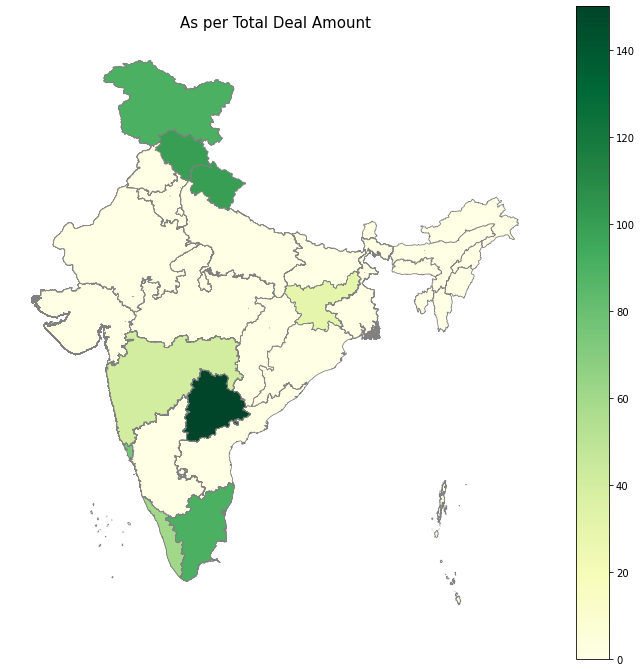

In [57]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('As per Total Deal Amount', fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Total Deal Amount', cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='0.5', legend=True)

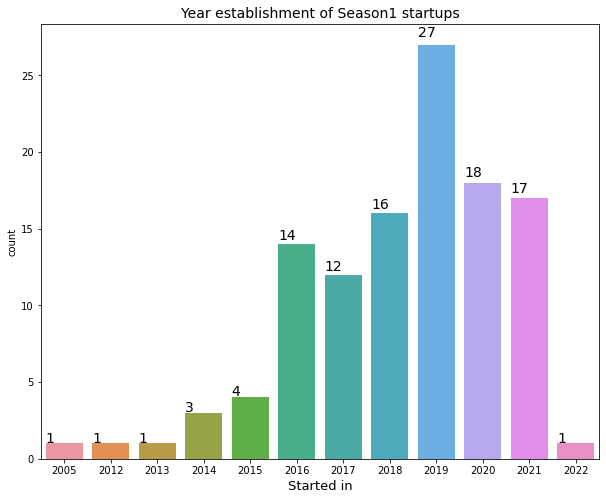

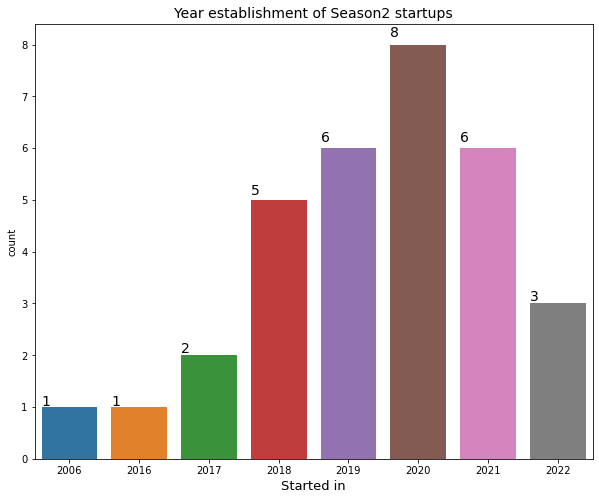

In [58]:
# Season 1 Startup companies started in year
fig = plt.figure(figsize=(10, 8))
plt.title('Year establishment of Season1 startups', size=14)
tmp = shark_tank_season1.loc[shark_tank_season1['Started in'].notnull()]
ax = sns.countplot(data = tmp, x = 'Started in')
ax.set_xlabel('Started in',fontsize=13)
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02), size=14)
        
# Season 2 Startup companies started in year
fig = plt.figure(figsize=(10, 8))
plt.title('Year establishment of Season2 startups', size=14)
tmp2 = shark_tank_season2.loc[shark_tank_season2['Started in'].notnull()]
ax = sns.countplot(data = tmp2, x = 'Started in')
ax.set_xlabel('Started in',fontsize=13)
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02), size=14)        

In [59]:
# Few companies got more amount than they asked/expected
shark_tank.loc[shark_tank['Original Ask Amount'] < shark_tank["Total Deal Amount"]][["Startup Name","Original Ask Amount","Total Deal Amount"]]

Startup Name  Original Ask Amount  Total Deal Amount
0      BluePineFoods                 50.0               75.0
10       JhaJiAchaar                 50.0               56.6
15     SkippiIcePops                 45.0              100.0
37             Annie                 30.0              105.0
39     TheYarnBazaar                 50.0              100.0
43   HammerLifestyle                 30.0              100.0
59           WeSTOCK                 50.0               60.0
64            INACAN                 50.0              100.0
76        TheSassBar                 40.0               50.0
89           HumpyA2                 75.0              100.0
109        TweekLabs                 40.0               60.0
110           Proxgy                 35.0              100.0
118         SneaKare                 20.0               21.0
152            Hoovu                 80.0              100.0
161   GearHeadMotors                 75.0              100.0
178      Zillionaire                 50.0              100.0
216         Broomees                 80.0              100.0
219          PadCare                 50.0              100.0
223           Geeani                 75.0              100.0
230           UnStop                100.0              200.0

In [60]:
# Most of the companies diluted/gave their company equity more than they initially offered/expected
shark_tank.loc[shark_tank['Original Offered Equity'] < shark_tank["Total Deal Equity"]][["Startup Name","Original Offered Equity","Total Deal Equity"]]

Startup Name  Original Offered Equity  Total Deal Equity
0       BluePineFoods                      5.0              16.00
1        BoozScooters                     15.0              50.00
2    HeartUpMySleeves                     10.0              30.00
3           TagzFoods                      1.0               2.75
7           Peeschute                      4.0               6.00
..                ...                      ...                ...
227    SharmaJiKiAata                     10.0              20.00
228          Manetain                      2.5              10.00
230            UnStop                      1.0               4.00
231           BlueTea                      1.0               3.00
232     TheGreenSnack                      2.0               8.00

[112 rows x 3 columns]

In [61]:
# Below companies got the same valuation they requested
shark_tank.loc[shark_tank['Valuation Requested'] == shark_tank["Valuation Offered"]][["Startup Name","Valuation Requested","Valuation Offered"]]

Startup Name  Valuation Requested  Valuation Offered
20              Kavach                 50.0               50.0
22         BeyondSnack               2000.0             2000.0
45             Cocofit                  0.0                0.0
86   WattTechnovations                  0.0                0.0
171     TheSimplySalad                300.0              300.0
185            Janitri               4000.0             4000.0
203          NeoMotion              10000.0            10000.0
219            PadCare               2500.0             2500.0
223             Geeani               1000.0             1000.0

In [62]:
# There is NO company which got more valuation than they pitched, JhaJi Achaar received after the Season (in 2023)
shark_tank.loc[shark_tank['Valuation Requested'] < shark_tank["Valuation Offered"]][["Startup Name","Valuation Requested","Valuation Offered"]]

Startup Name  Valuation Requested  Valuation Offered
10  JhaJiAchaar                500.0             1007.0

In [63]:
# Some companies were on pre-revenue or didn't had any revenue (as of pitching day)
shark_tank.loc[shark_tank['Yearly Revenue'] == 0]

Season Number  Episode Number                      Episode Title  \
24               1               8  Shark Ko Impress Karne Wale Ideas   
42               1              14            Naye Aur Nayab Pitchers   
83               1              26                Revolutionary Ideas   
98               1              30                Sharks Ki Expertise   
100              1              31           Entrepreneurship Ki Raah   
114              1              34                  Scaling Ambitions   
131              1               0                             Unseen   
205              2              18      Business Ideas With Potential   
206              2              19          Building Brands For India   

     Pitch Number     Startup Name             Industry  \
24             25     MotionBreeze  Electrical Vehicles   
42             43    GoodGoodPiggy           Technology   
83             84  JulaaAutomation        Manufacturing   
98             99         Scholify            Education   
100           101       Sabjikothi        Manufacturing   
114           115          On2Cook                 Food   
131           132        Scintiglo              Medical   
205           206         Sayonara       Beauty/Fashion   
206           207              PMV  Electrical Vehicles   

                                  Business Description  \
24                           Smart Electric Motorcycle   
42                                  Digital Piggy Bank   
83                                    Automatic Cradle   
98                                Scholarship Platform   
100                      Vegetables Storage SaptKrishi   
114                             Fastest Cooking Device   
131  Diagnostic device for microalbuminuria estimation   
205                                          Petticoat   
206                          Personal Mobility Vehicle   

                      Company Website  Number of Presenters  Male Presenters  \
24   https://www.motionautomotive.in/                     4                4   
42         https://goodgoodpiggy.com/                     2             <NA>   
83    https://www.automaticjulaa.com/                     3                3   
98            https://scholifyme.com/                     1                1   
100       https://www.saptkrishi.com/                     2                1   
114              https://on2cook.com/                     1                1   
131                  https://cemd.in/                     1                1   
205                               NaN                     1                1   
206          https://pmvelectric.com/                     1                1   

     Female Presenters  Transgender Presenters  Couple Presenters  \
24                <NA>                    <NA>                  0   
42                   2                    <NA>                  0   
83                <NA>                    <NA>                  0   
98                <NA>                    <NA>                  0   
100                  1                    <NA>                  0   
114               <NA>                    <NA>                  0   
131               <NA>                    <NA>                  0   
205               <NA>                    <NA>                  0   
206               <NA>                    <NA>                  0   

    Pitchers Average Age  Started in Pitchers City  Pitchers State  \
24                Middle        <NA>      Vadodara         Gujarat   
42                 Young        <NA>         Delhi           Delhi   
83                Middle        2022           NaN         Gujarat   
98                Middle        <NA>     Bangalore       Karnataka   
100                Young        <NA>     Bhagalpur           Bihar   
114               Middle        <NA>           NaN             NaN   
131               Middle        2021        Indore  Madhya Pradesh   
205               Middle        <NA>           NaN

In [64]:
# Some companies were on burning/paying money from their pocket, without any profit (as of pitching day)
shark_tank.loc[shark_tank['Yearly Revenue'] < 0]

Season Number  Episode Number  \
137              1               0   
140              1               0   
157              2               2   
165              2               5   
194              2              15   
196              2              16   
208              2              19   
214              2              21   
219              2              23   
232              2              27   

                                    Episode Title  Pitch Number  \
137                                        Unseen           138   
140                                        Unseen           141   
157                               A Bigger Vision           158   
165              Investing in the Future of India           166   
194  Changing The Face Of Indian Entrepreneurship           195   
196                          Pitchers Ki Taiyyari           197   
208                     Building Brands For India           209   
214              Adhbhut Aur Anokhe Entrepreneurs           215   
219                            Changing The World           220   
232                        Nayi Soch Naye Vichaar           233   

      Startup Name             Industry                 Business Description  \
137   ZyppElectric  Electrical Vehicles                  Electrical Vehicles   
140       HappyBar                 Food            FitSport delicious snacks   
157          SoupX                 Food                     Soup based meals   
165      Flatheads       Beauty/Fashion               Shoes Sneakers Loafers   
194     FastBeetle             Services     Local courier and parcel service   
196         VSMani                 Food                    Coffee and snacks   
208      Bullspree           Technology     App to learn stock market basics   
214    CloudTailor             Services                 Custom tailor online   
219        PadCare        Manufacturing  Menstrual hygiene disposal solution   
232  TheGreenSnack                 Food                Healthy Snacks Online   

                  Company Website  Number of Presenters  Male Presenters  \
137             https://zypp.app/                     2                1   
140      https://www.fitsport.me/                     3                2   
157         https://www.soupx.in/                     2                2   
165     https://www.flatheads.in/                     1                1   
194   https://www.fastbeetle.com/                     2                2   
196           https://vsmani.com/                     3                3   
208        https://bullspree.com/                     3                3   
214  https://www.cloudtailor.com/                     3                2   
219  https://www.padcarelabs.com/                     1                1   
232  https://thegreensnackco.com/                     2                1   

     Female Presenters  Transgender Presenters  Couple Presenters  \
137                  1                    <NA>                  1   
140                  1                    <NA>                  0   
157               <NA>                    <NA>                  0   
165               <NA>                    <NA>                  0   
194               <NA>                    <NA>                  0   
196               <NA>                    <NA>                  0   
208               <NA>                    <NA>                  0   
214                  1                    <NA>                  1   
219               <NA>                    <NA>                  0   
232                  1                    <NA>                  1   

    Pitchers Average Age  Started in    Pitchers City   Pitchers State  \
137                Young        <NA>          Gurgaon          Haryana   
140               Middle        2019        Hyderabad        Telangana   
157                Young        <NA>            Delhi            Delhi   
165               Middle        2019        Bangalore        Karnataka   


In [65]:
# Top 15 Highest Yearly Revenue brands
print(shark_tank.groupby('Startup Name')['Yearly Revenue'].max().nlargest(15))

tmpdf = shark_tank.sort_values('Yearly Revenue', ascending=False)[0:15]
fig = px.bar(tmpdf, x="Startup Name", y='Yearly Revenue', color="Startup Name", template='simple_white', title="<b>Highest revenue of participated startups</b>", text=tmpdf['Yearly Revenue'].map(int).map(str) + " lakhs")
fig.show()

Startup Name
FrenchCrown          7200
GuardianGears        2500
GunjanAppsStudios    2400
UnStop               1600
RaisingSuperstars    1300
Eume                 1200
PlayBoxTV            1020
Alpino               1000
BlueTea              1000
HammerLifestyle      1000
ShadesofSpring        900
TagzFoods             700
ScrapUncle            600
Devnagri              500
NeoMotion             470
Name: Yearly Revenue, dtype: Int32


In [66]:
# Top 15 highest Gross Margin brands
print(shark_tank.groupby('Startup Name')['Gross Margin'].max().nlargest(15))

tmpdf = shark_tank.sort_values('Gross Margin', ascending=False)[0:15]
fig = px.bar(tmpdf, x="Startup Name", y='Gross Margin', color="Startup Name", template='simple_white', title="<b>Highest Gross margin of the brands</b>", text=tmpdf['Gross Margin'].map(int).map(str) + "%")
fig.show()

Startup Name
Poo-de-Cologne        150
Farda                 115
Cocofit                95
UnStop                 90
Auli                   80
LeafyAffair            80
Pflow                  80
ekatra                 80
CosIQ                  75
Dabble                 75
JaipurWatchCompany     75
TheaandSid             75
Bummer                 70
FrenchCrown            70
Moonshine              70
Name: Gross Margin, dtype: Int32


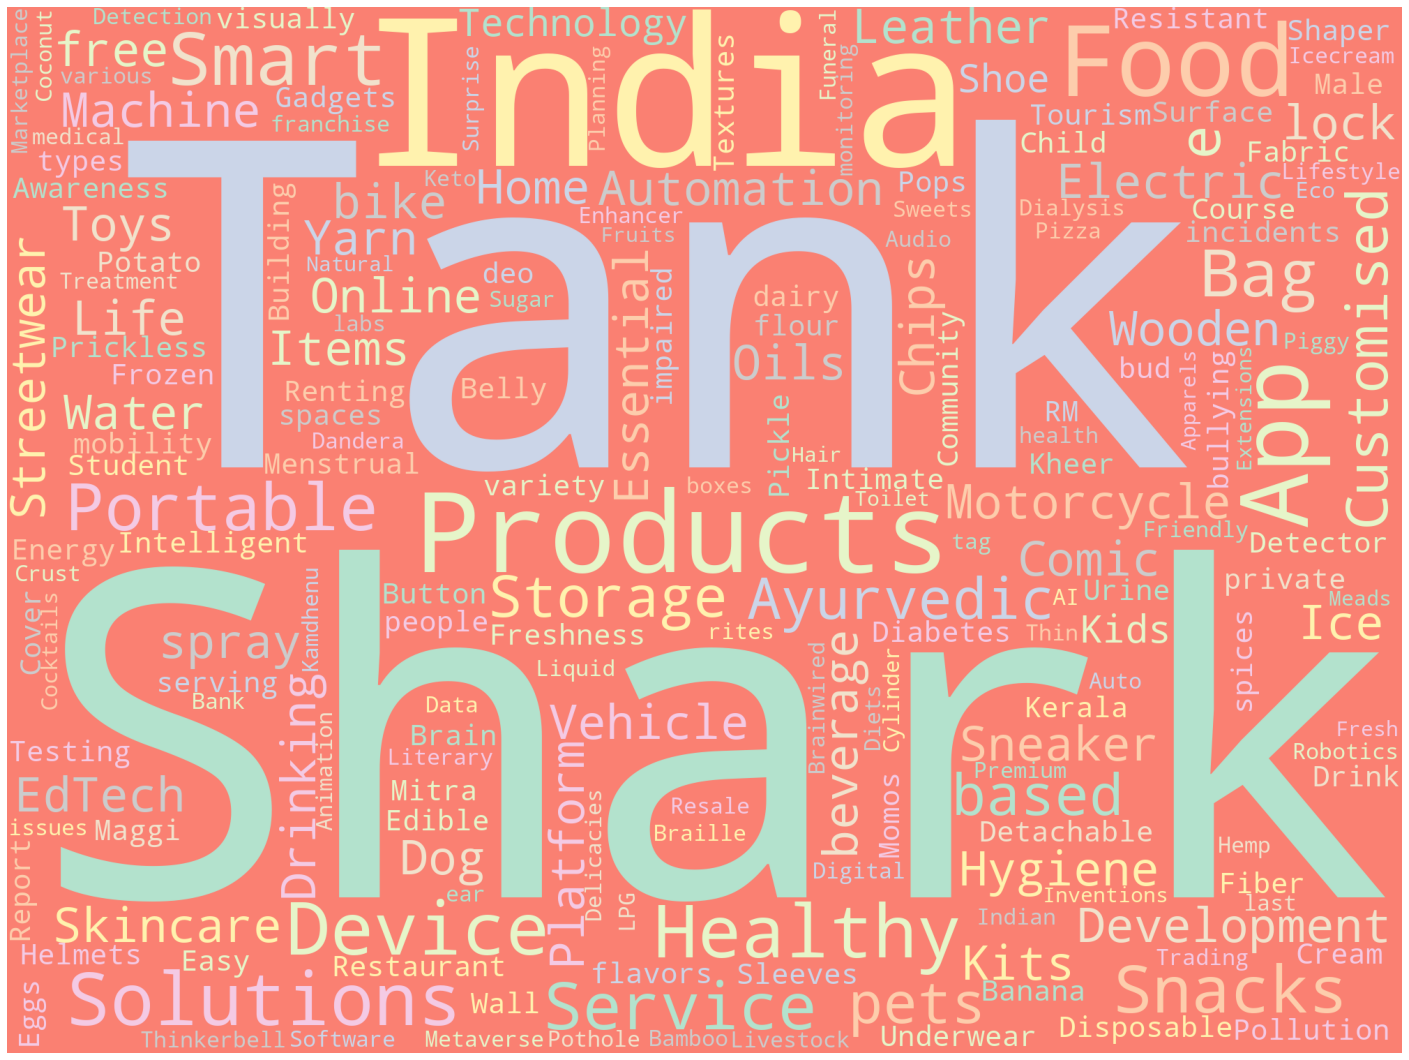

In [67]:
# Word cloud based on Business Description, startups came in season 1
text = " Shark Tank India ".join(cat for cat in shark_tank_season1['Business Description'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='salmon', colormap='Pastel2', collocations=False, random_state=2023).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

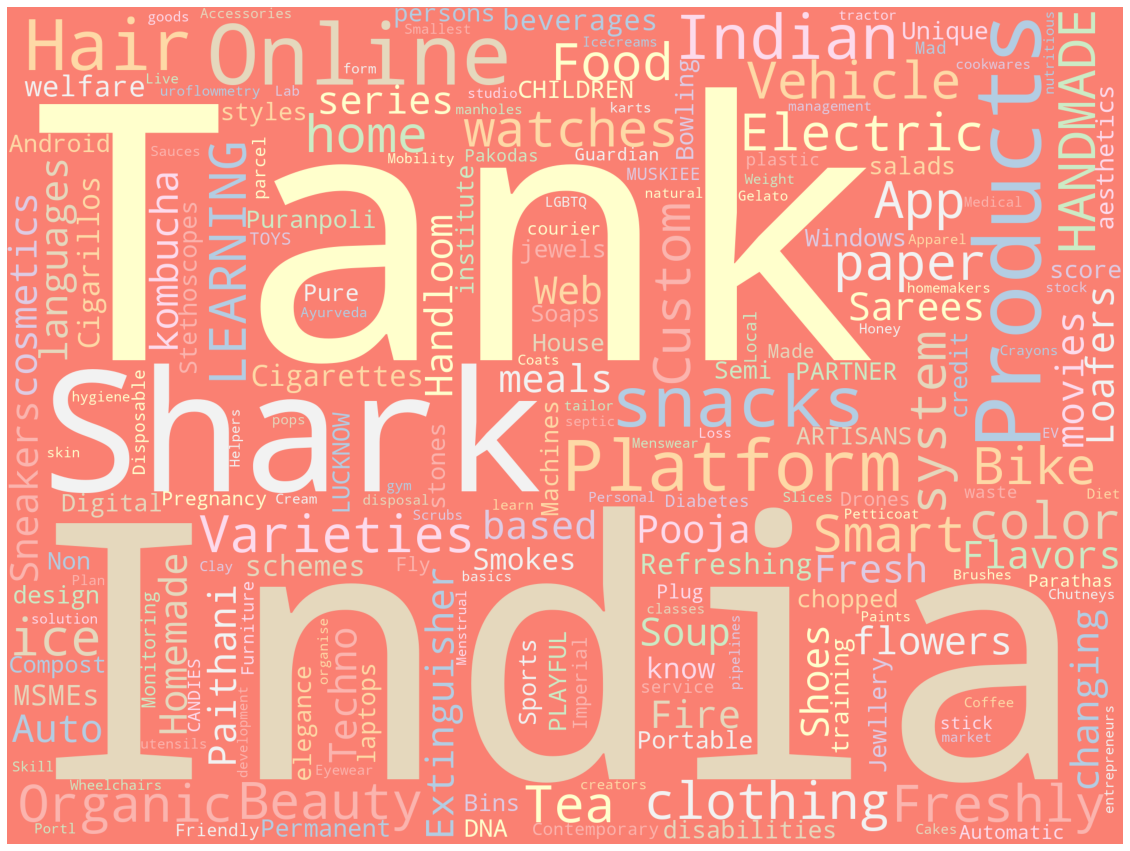

In [68]:
# Word cloud based on Business Description, startups came in season 2
text = " Shark Tank India ".join(cat for cat in shark_tank_season2.loc[shark_tank_season2['Business Description'].notnull()]['Business Description'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='salmon', colormap='Pastel1', collocations=False, random_state=2023).generate(text)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## ⭐ Hindi Bigg Boss Season16
## https://www.kaggle.com/code/thirumani/predicting-bigg-boss-hindi-season-16-winner

## Kannada Bigg Boss Season9
## https://www.kaggle.com/code/thirumani/predicting-bigg-boss-kannada-season-9-winner

## Telugu Bigg Boss Season6
## https://www.kaggle.com/code/thirumani/predicting-bigg-boss-telugu-season-6-winner

## Tamil Bigg Boss Season6
## https://www.kaggle.com/code/thirumani/predicting-bigg-boss-tamil-season-6-winner

## Malayalam Bigg Boss Season5
## https://www.kaggle.com/code/thirumani/predicting-bigg-boss-malayalam-season-5-winner

## Marathi Bigg Boss Season4
## https://www.kaggle.com/code/thirumani/predicting-bigg-boss-marathi-season-4-winner

## Bangla Bigg Boss Season3
## https://www.kaggle.com/code/thirumani/predicting-bigg-boss-bangla-season-3-winner

In [69]:
# Correlation matrix
shark_tank.corr().style.background_gradient(cmap = 'Blues')

In [70]:
print("numpy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
import matplotlib
print("matplotlib version: {}". format(matplotlib. __version__))
print("seaborn version: {}". format(sns.__version__))
import plotly
print("plotly version: {}". format(plotly.__version__))

# Current versions
# numpy version: 1.21.6
# pandas version: 1.3.5
# matplotlib version: 3.5.2
# seaborn version: 0.11.2
# plotly version: 5.13.0

numpy version: 1.21.6
pandas version: 1.3.5
matplotlib version: 3.5.2
seaborn version: 0.11.2
plotly version: 5.13.0


## Data set values verification (you can ignore below section)
##### below queries should not return any rows

In [71]:
shark_tank.loc[shark_tank['Number of Presenters'] != shark_tank['Male Presenters'].fillna(0) + shark_tank['Female Presenters'] + shark_tank['Transgender Presenters'].fillna(0)]

Empty DataFrame
Columns: [Season Number, Episode Number, Episode Title, Pitch Number, Startup Name, Industry, Business Description, Company Website, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Started in, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Valuation Offered, Number of sharks in deal, Ashneer Investment Amount, Ashneer Investment Equity, Ashneer Debt Amount, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ghazal Investment Amount, Ghazal Investment Equity, Ghazal Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount]
Index: []

[0 rows x 56 columns]

In [72]:
shark_tank.loc[(shark_tank['Male Presenters'].isnull()) & (shark_tank['Couple Presenters'] == 1)]

Empty DataFrame
Columns: [Season Number, Episode Number, Episode Title, Pitch Number, Startup Name, Industry, Business Description, Company Website, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Started in, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Valuation Offered, Number of sharks in deal, Ashneer Investment Amount, Ashneer Investment Equity, Ashneer Debt Amount, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ghazal Investment Amount, Ghazal Investment Equity, Ghazal Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount]
Index: []

[0 rows x 56 columns]

In [73]:
shark_tank.loc[(shark_tank['Female Presenters'].isnull()) & (shark_tank['Couple Presenters'] == 1)]

Empty DataFrame
Columns: [Season Number, Episode Number, Episode Title, Pitch Number, Startup Name, Industry, Business Description, Company Website, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Started in, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Valuation Offered, Number of sharks in deal, Ashneer Investment Amount, Ashneer Investment Equity, Ashneer Debt Amount, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ghazal Investment Amount, Ghazal Investment Equity, Ghazal Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount]
Index: []

[0 rows x 56 columns]

In [74]:
shark_tank.loc[(shark_tank['Accepted Offer'] == 1) & (shark_tank['Total Deal Amount'].isnull())]

Empty DataFrame
Columns: [Season Number, Episode Number, Episode Title, Pitch Number, Startup Name, Industry, Business Description, Company Website, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Started in, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Valuation Offered, Number of sharks in deal, Ashneer Investment Amount, Ashneer Investment Equity, Ashneer Debt Amount, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ghazal Investment Amount, Ghazal Investment Equity, Ghazal Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount]
Index: []

[0 rows x 56 columns]

In [75]:
shark_tank.loc[(shark_tank['Accepted Offer'] == 1) & (shark_tank['Number of sharks in deal'].isnull())]

Empty DataFrame
Columns: [Season Number, Episode Number, Episode Title, Pitch Number, Startup Name, Industry, Business Description, Company Website, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Started in, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Valuation Offered, Number of sharks in deal, Ashneer Investment Amount, Ashneer Investment Equity, Ashneer Debt Amount, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ghazal Investment Amount, Ghazal Investment Equity, Ghazal Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount]
Index: []

[0 rows x 56 columns]

In [76]:
shark_tank.loc[(shark_tank['Accepted Offer'].isnull()) & (shark_tank['Number of sharks in deal'] >= 1)]

Empty DataFrame
Columns: [Season Number, Episode Number, Episode Title, Pitch Number, Startup Name, Industry, Business Description, Company Website, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Started in, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Valuation Offered, Number of sharks in deal, Ashneer Investment Amount, Ashneer Investment Equity, Ashneer Debt Amount, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ghazal Investment Amount, Ghazal Investment Equity, Ghazal Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount]
Index: []

[0 rows x 56 columns]

In [77]:
shark_tank.loc[round(shark_tank['Total Deal Amount'].fillna(0),1) != round(shark_tank['Ashneer Investment Amount'].fillna(0) + shark_tank['Namita Investment Amount'].fillna(0) + shark_tank['Anupam Investment Amount'].fillna(0) + shark_tank['Vineeta Investment Amount'].fillna(0) + shark_tank['Aman Investment Amount'].fillna(0) + shark_tank['Peyush Investment Amount'].fillna(0) + shark_tank['Ghazal Investment Amount'].fillna(0) + shark_tank['Amit Investment Amount'].fillna(0), 1)]

Empty DataFrame
Columns: [Season Number, Episode Number, Episode Title, Pitch Number, Startup Name, Industry, Business Description, Company Website, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Started in, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Valuation Offered, Number of sharks in deal, Ashneer Investment Amount, Ashneer Investment Equity, Ashneer Debt Amount, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ghazal Investment Amount, Ghazal Investment Equity, Ghazal Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount]
Index: []

[0 rows x 56 columns]

In [78]:
shark_tank.loc[round(shark_tank['Total Deal Equity'].fillna(0),1) != round(shark_tank['Ashneer Investment Equity'].fillna(0) + shark_tank['Namita Investment Equity'].fillna(0) + shark_tank['Anupam Investment Equity'].fillna(0) + shark_tank['Vineeta Investment Equity'].fillna(0) + shark_tank['Aman Investment Equity'].fillna(0) + shark_tank['Peyush Investment Equity'].fillna(0) + shark_tank['Ghazal Investment Equity'].fillna(0) + shark_tank['Amit Investment Equity'].fillna(0),1)]

Empty DataFrame
Columns: [Season Number, Episode Number, Episode Title, Pitch Number, Startup Name, Industry, Business Description, Company Website, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Started in, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Valuation Offered, Number of sharks in deal, Ashneer Investment Amount, Ashneer Investment Equity, Ashneer Debt Amount, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ghazal Investment Amount, Ghazal Investment Equity, Ghazal Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount]
Index: []

[0 rows x 56 columns]

In [79]:
shark_tank.loc[round(shark_tank['Total Deal Debt'].fillna(0),1) != round(shark_tank['Ashneer Debt Amount'].fillna(0) + shark_tank['Namita Debt Amount'].fillna(0) + shark_tank['Anupam Debt Amount'].fillna(0) + shark_tank['Vineeta Debt Amount'].fillna(0) + shark_tank['Aman Debt Amount'].fillna(0) + shark_tank['Peyush Debt Amount'].fillna(0) + shark_tank['Ghazal Debt Amount'].fillna(0)+ shark_tank['Amit Debt Amount'].fillna(0),1)]

Empty DataFrame
Columns: [Season Number, Episode Number, Episode Title, Pitch Number, Startup Name, Industry, Business Description, Company Website, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Started in, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Valuation Offered, Number of sharks in deal, Ashneer Investment Amount, Ashneer Investment Equity, Ashneer Debt Amount, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ghazal Investment Amount, Ghazal Investment Equity, Ghazal Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount]
Index: []

[0 rows x 56 columns]

In [80]:
shark_tank.loc[(shark_tank['Received Offer'] == 1) & (shark_tank['Accepted Offer'].isnull())]

Empty DataFrame
Columns: [Season Number, Episode Number, Episode Title, Pitch Number, Startup Name, Industry, Business Description, Company Website, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Started in, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Valuation Offered, Number of sharks in deal, Ashneer Investment Amount, Ashneer Investment Equity, Ashneer Debt Amount, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ghazal Investment Amount, Ghazal Investment Equity, Ghazal Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount]
Index: []

[0 rows x 56 columns]

In [81]:
shark_tank.loc[(shark_tank['Received Offer'] == 0) & (shark_tank['Accepted Offer'].notnull())]

Empty DataFrame
Columns: [Season Number, Episode Number, Episode Title, Pitch Number, Startup Name, Industry, Business Description, Company Website, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Started in, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Valuation Offered, Number of sharks in deal, Ashneer Investment Amount, Ashneer Investment Equity, Ashneer Debt Amount, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ghazal Investment Amount, Ghazal Investment Equity, Ghazal Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount]
Index: []

[0 rows x 56 columns]

In [82]:
shark_tank.loc[shark_tank['Number of sharks in deal'].fillna(0).round(0).astype(int) != shark_tank['Ashneer Investment Amount'].notnull().astype("int") + shark_tank['Namita Investment Amount'].notnull().astype("int") + shark_tank['Anupam Investment Amount'].notnull().astype("int") + shark_tank['Vineeta Investment Amount'].notnull().astype("int") + shark_tank['Aman Investment Amount'].notnull().astype("int") + shark_tank['Peyush Investment Amount'].notnull().astype("int") + shark_tank['Ghazal Investment Amount'].notnull().astype("int") + shark_tank['Amit Investment Amount'].notnull().astype("int")]

Empty DataFrame
Columns: [Season Number, Episode Number, Episode Title, Pitch Number, Startup Name, Industry, Business Description, Company Website, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Started in, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Valuation Offered, Number of sharks in deal, Ashneer Investment Amount, Ashneer Investment Equity, Ashneer Debt Amount, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ghazal Investment Amount, Ghazal Investment Equity, Ghazal Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount]
Index: []

[0 rows x 56 columns]

In [83]:
shark_tank.loc[(shark_tank['Couple Presenters'] != 0) & (shark_tank['Couple Presenters'] != 1)]

Empty DataFrame
Columns: [Season Number, Episode Number, Episode Title, Pitch Number, Startup Name, Industry, Business Description, Company Website, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Started in, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Valuation Offered, Number of sharks in deal, Ashneer Investment Amount, Ashneer Investment Equity, Ashneer Debt Amount, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ghazal Investment Amount, Ghazal Investment Equity, Ghazal Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount]
Index: []

[0 rows x 56 columns]

In [84]:
shark_tank.loc[(shark_tank['Received Offer'] != 0) & (shark_tank['Received Offer'] != 1)]

Empty DataFrame
Columns: [Season Number, Episode Number, Episode Title, Pitch Number, Startup Name, Industry, Business Description, Company Website, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Started in, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Valuation Offered, Number of sharks in deal, Ashneer Investment Amount, Ashneer Investment Equity, Ashneer Debt Amount, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ghazal Investment Amount, Ghazal Investment Equity, Ghazal Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount]
Index: []

[0 rows x 56 columns]

In [85]:
shark_tank.loc[(shark_tank['Accepted Offer'] != 0) & (shark_tank['Accepted Offer'] != 1)]

Empty DataFrame
Columns: [Season Number, Episode Number, Episode Title, Pitch Number, Startup Name, Industry, Business Description, Company Website, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Started in, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Valuation Offered, Number of sharks in deal, Ashneer Investment Amount, Ashneer Investment Equity, Ashneer Debt Amount, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ghazal Investment Amount, Ghazal Investment Equity, Ghazal Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount]
Index: []

[0 rows x 56 columns]